
# BE Meteo 
## HERVIOUX, SOURDEVAL, MANCIET, DUC-MARTIN, LEFAUCONNIER

In [1]:
path_data <- paste(readLines("path.txt"), collapse = "\n")
path_data

[1] "/mnt/c/Users/Utilisateur/Desktop/donnees-synop-essentielles-omm.csv"

In [2]:
#install.packages("data.table")
library(data.table)
dataset_meteo <- fread(path_data)
head(dataset_meteo)

ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,⋯,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
<int>,<dttm>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
7690,2017-04-05 09:00:00,101580,100,2,90,1.3,289.95,285.25,74,⋯,2,Nice,06088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,93,4
61998,2017-04-05 09:00:00,102720,-200,8,320,20.1,285.65,281.95,78,⋯,29,,,,NA,,,,NA,4
78925,2018-04-04 03:00:00,101420,60,1,100,3.6,298.45,295.15,82,⋯,3,Le Lamentin,97213,CA du Centre de la Martinique,249720061,Martinique,972,Martinique,2,4
61998,2018-04-05 03:00:00,101190,40,1,290,5.1,278.15,272.75,68,⋯,29,,,,NA,,,,NA,4
7690,2018-04-05 06:00:00,101240,-20,5,320,1.6,284.25,280.15,76,⋯,2,Nice,06088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,93,4
7149,2018-04-08 03:00:00,100730,-20,5,30,2.3,285.55,283.25,86,⋯,89,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,4


# 1 - Description des données
   
Idées :
- Présentation des données (nombre, type (température pression, lieux...))
- Agrégation des valeurs (par ID station météo, par région ?)
- Carte de la France avec lieux des stations
- Carte avec les températures/pression moyenne/min/max des stations
- Données manquantes

In [3]:
df_meteo <- data.frame(dataset_meteo)
df_meteo <- df_meteo[order(df_meteo$Date), ] # Trier les valeurs par ordre chronologique
head(df_meteo)

: 

In [ ]:
colnames(df_meteo)

In [6]:
cat("Nombre de lignes de données :", nrow(df_meteo), "\n")
cat("Nombre de paramètres :", ncol(df_meteo), "\n")
cat("\tdont 14 paramètres décrivant l'emplacement de la station météo\n")
cat("\tdont 19 paramètres relatifs aux nuages/à la nébulosité (+ 4 hauteurs de bases)\n")
cat("\tdont 14 paramètres relatifs à la température\n")
cat("\tdont 7 paramètres relatifs à la pression/barométrie\n")
cat("\tdont 5 paramètres relatifs au vent/rafales\n")
cat("\tdont 5 paramètres relatifs à la pluie (précipitations)\n")
cat("\tdont 3 paramètres relatifs à la neige\n")
cat("\tdont 2 paramètres relatifs à l'humidité/rosée\n")
cat("\t + Date, mois_de_l_annee, Visibilité.horizontale, Temps.présent, Temps.passé.1, Temps.passé.2, Géopotentiel, Etat.du.sol, Phénomène.spécial.1, Phénomène.spécial.2, Phénomène.spécial.3, Phénomène.spécial.4, Temps.passé.1.1, Temps.présent.1")

# TODO : /!\ Erreur 1 paramètre a dû être compté 2 fois (82 colonnes en tout et mon décompte arrive à 83 paramètres)

Nombre de lignes de données : 1719567 
Nombre de paramètres : 82 
	dont 14 paramètres décrivant l'emplacement de la station météo
	dont 19 paramètres relatifs aux nuages/à la nébulosité (+ 4 hauteurs de bases)
	dont 14 paramètres relatifs à la température
	dont 7 paramètres relatifs à la pression/barométrie
	dont 5 paramètres relatifs au vent/rafales
	dont 5 paramètres relatifs à la pluie (précipitations)
	dont 3 paramètres relatifs à la neige
	dont 2 paramètres relatifs à l'humidité/rosée
	 + Date, mois_de_l_annee, Visibilité.horizontale, Temps.présent, Temps.passé.1, Temps.passé.2, Géopotentiel, Etat.du.sol, Phénomène.spécial.1, Phénomène.spécial.2, Phénomène.spécial.3, Phénomène.spécial.4, Temps.passé.1.1, Temps.présent.1

### Description des stations météo

In [7]:
# Caractéristiques des stations météo
df_stations <- df_meteo[c('ID.OMM.station', 'Coordonnees', 'Nom', 'Latitude', 'Longitude', 'Altitude', 'communes..name.', 'communes..code.', 'EPCI..name.', 'EPCI..code.', 'department..name.', 'department..code.', 'region..name.', 'region..code.')]
df_unique_stations <- df_stations[!duplicated(df_stations[c('ID.OMM.station')]), ]
cat("Nombre de stations météo :", nrow(df_unique_stations))
head(df_unique_stations[order(df_unique_stations$Nom), ])

Nombre de stations météo : 62

,ID.OMM.station,Coordonnees,Nom,Latitude,Longitude,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.
,<int>,<chr>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
1570017,7005,"50.136, 1.834",ABBEVILLE,50.13600,1.834000,69,Abbeville,80001,Communauté d'agglomération de la Baie de Somme,200070993,Somme,80,Hauts-de-France,32
671539,7761,"41.918, 8.792667",AJACCIO,41.91800,8.792667,5,Ajaccio,2A004,Communauté d'agglomération du Pays Ajaccien,242010056,Corse-du-Sud,2A,Corse,94
1474178,7139,"48.4455, 0.110167",ALENCON,48.44550,0.110167,143,Cerisé,61077,Communauté urbaine d'Alençon,246100663,Orne,61,Normandie,28
457248,7299,"47.614333, 7.51",BALE-MULHOUSE,47.61433,7.510000,263,Blotzheim,68042,Communauté d'agglomération Saint-Louis Agglomération,200066058,Haut-Rhin,68,Grand Est,44
1713283,7790,"42.540667, 9.485167",BASTIA,42.54067,9.485167,10,Lucciana,2B148,Communauté de communes de Marana-Golo,200036499,Haute-Corse,2B,Corse,94
1386709,7207,"47.294333, -3.218333",BELLE ILE-LE TALUT,47.29433,-3.218333,34,Bangor,56009,Communauté de communes de Belle-Île-en-Mer,245600465,Morbihan,56,Bretagne,53


### Carte des stations météo

ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


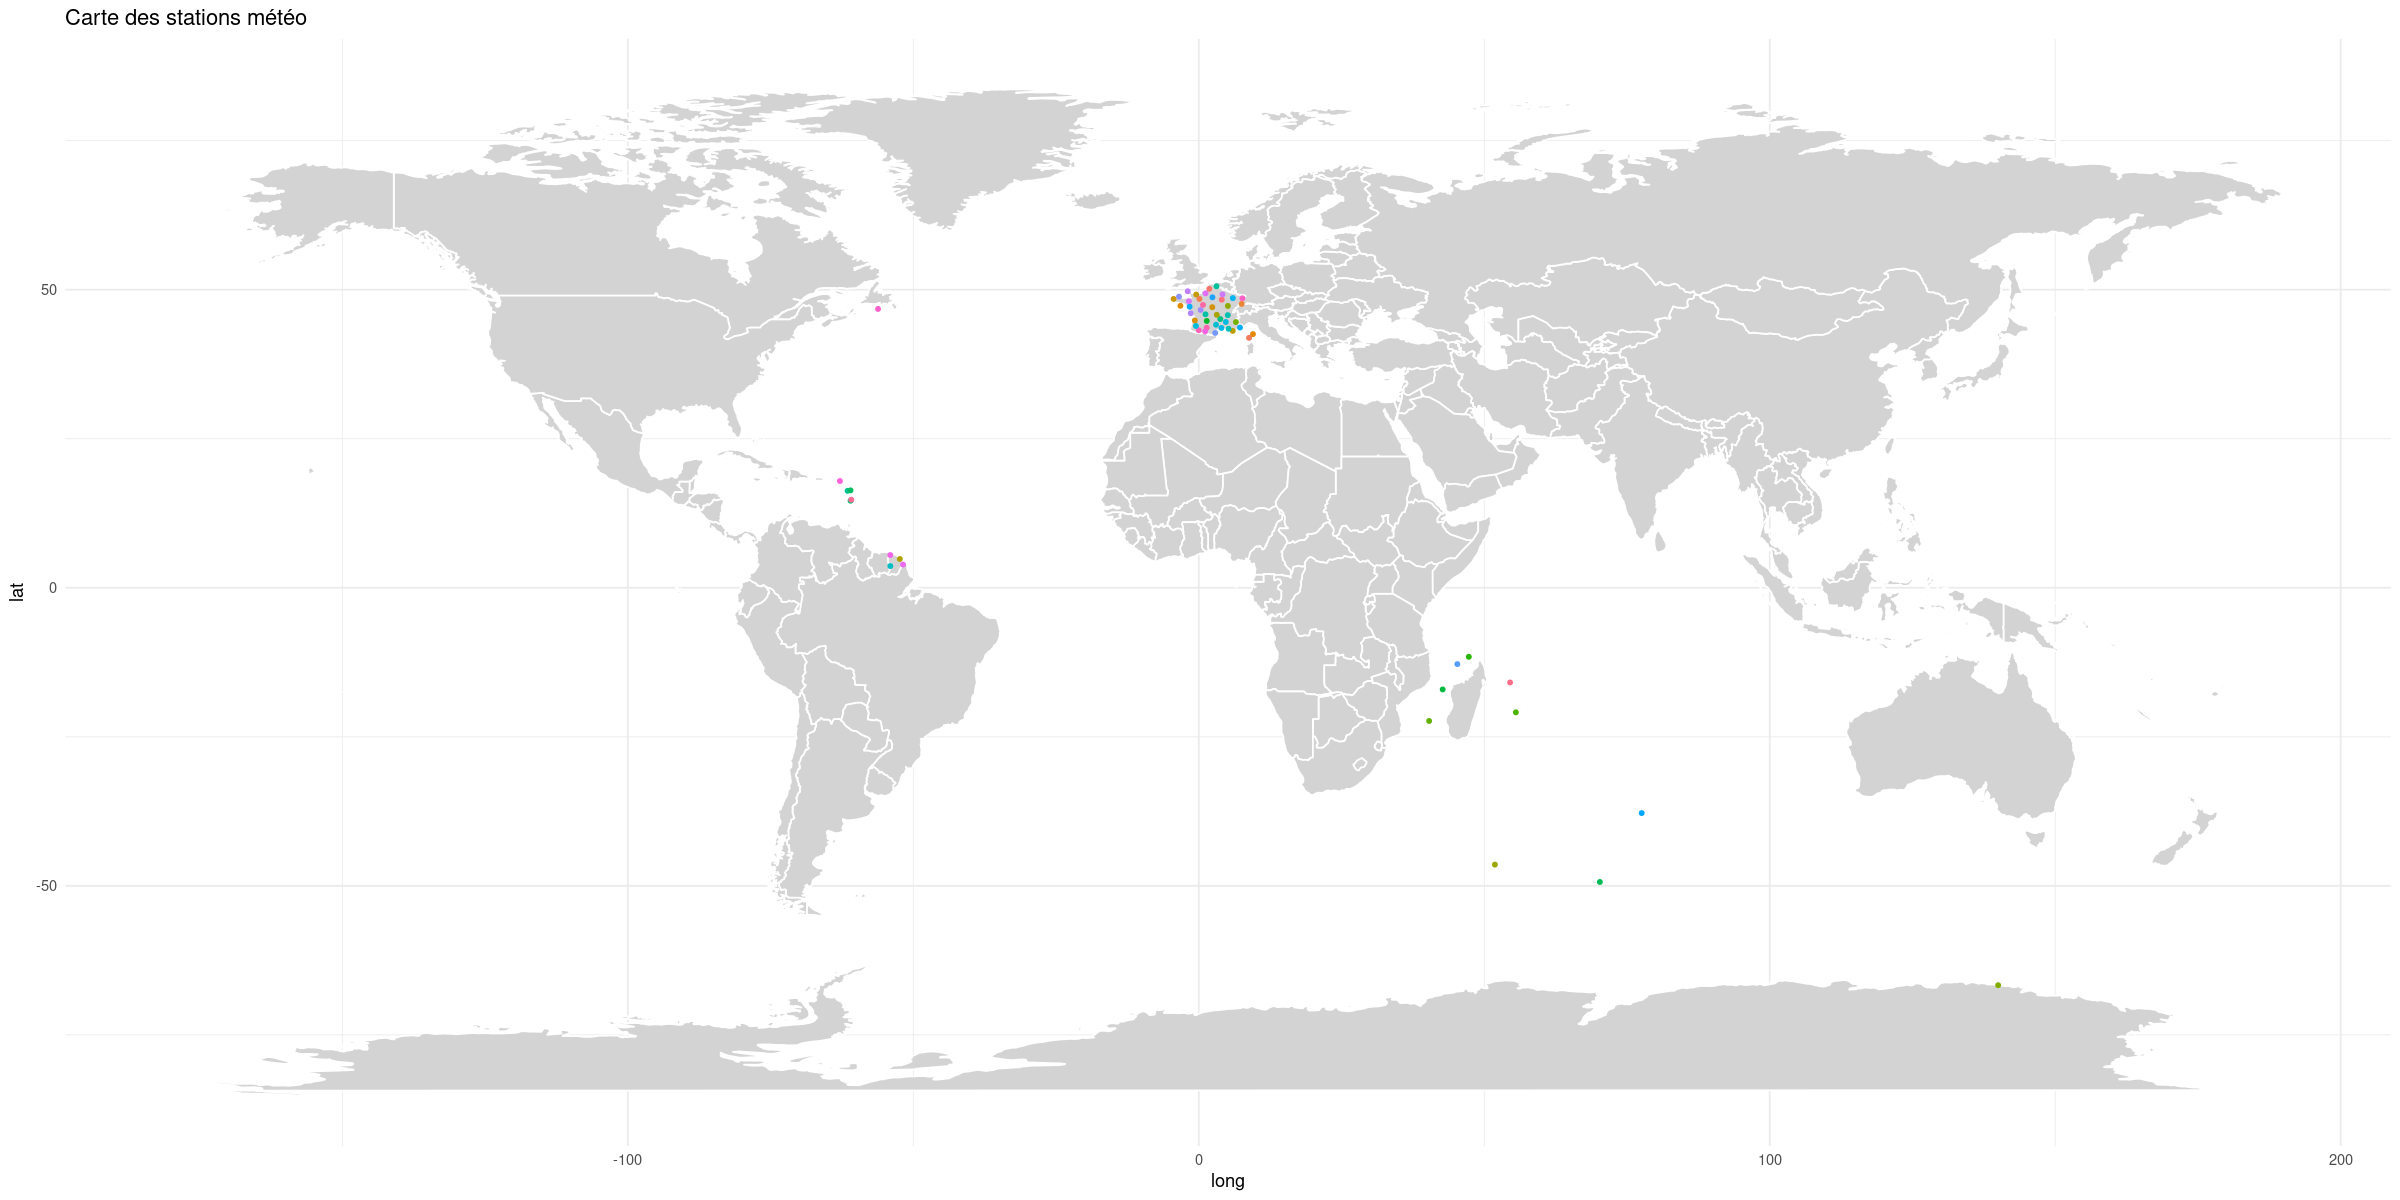

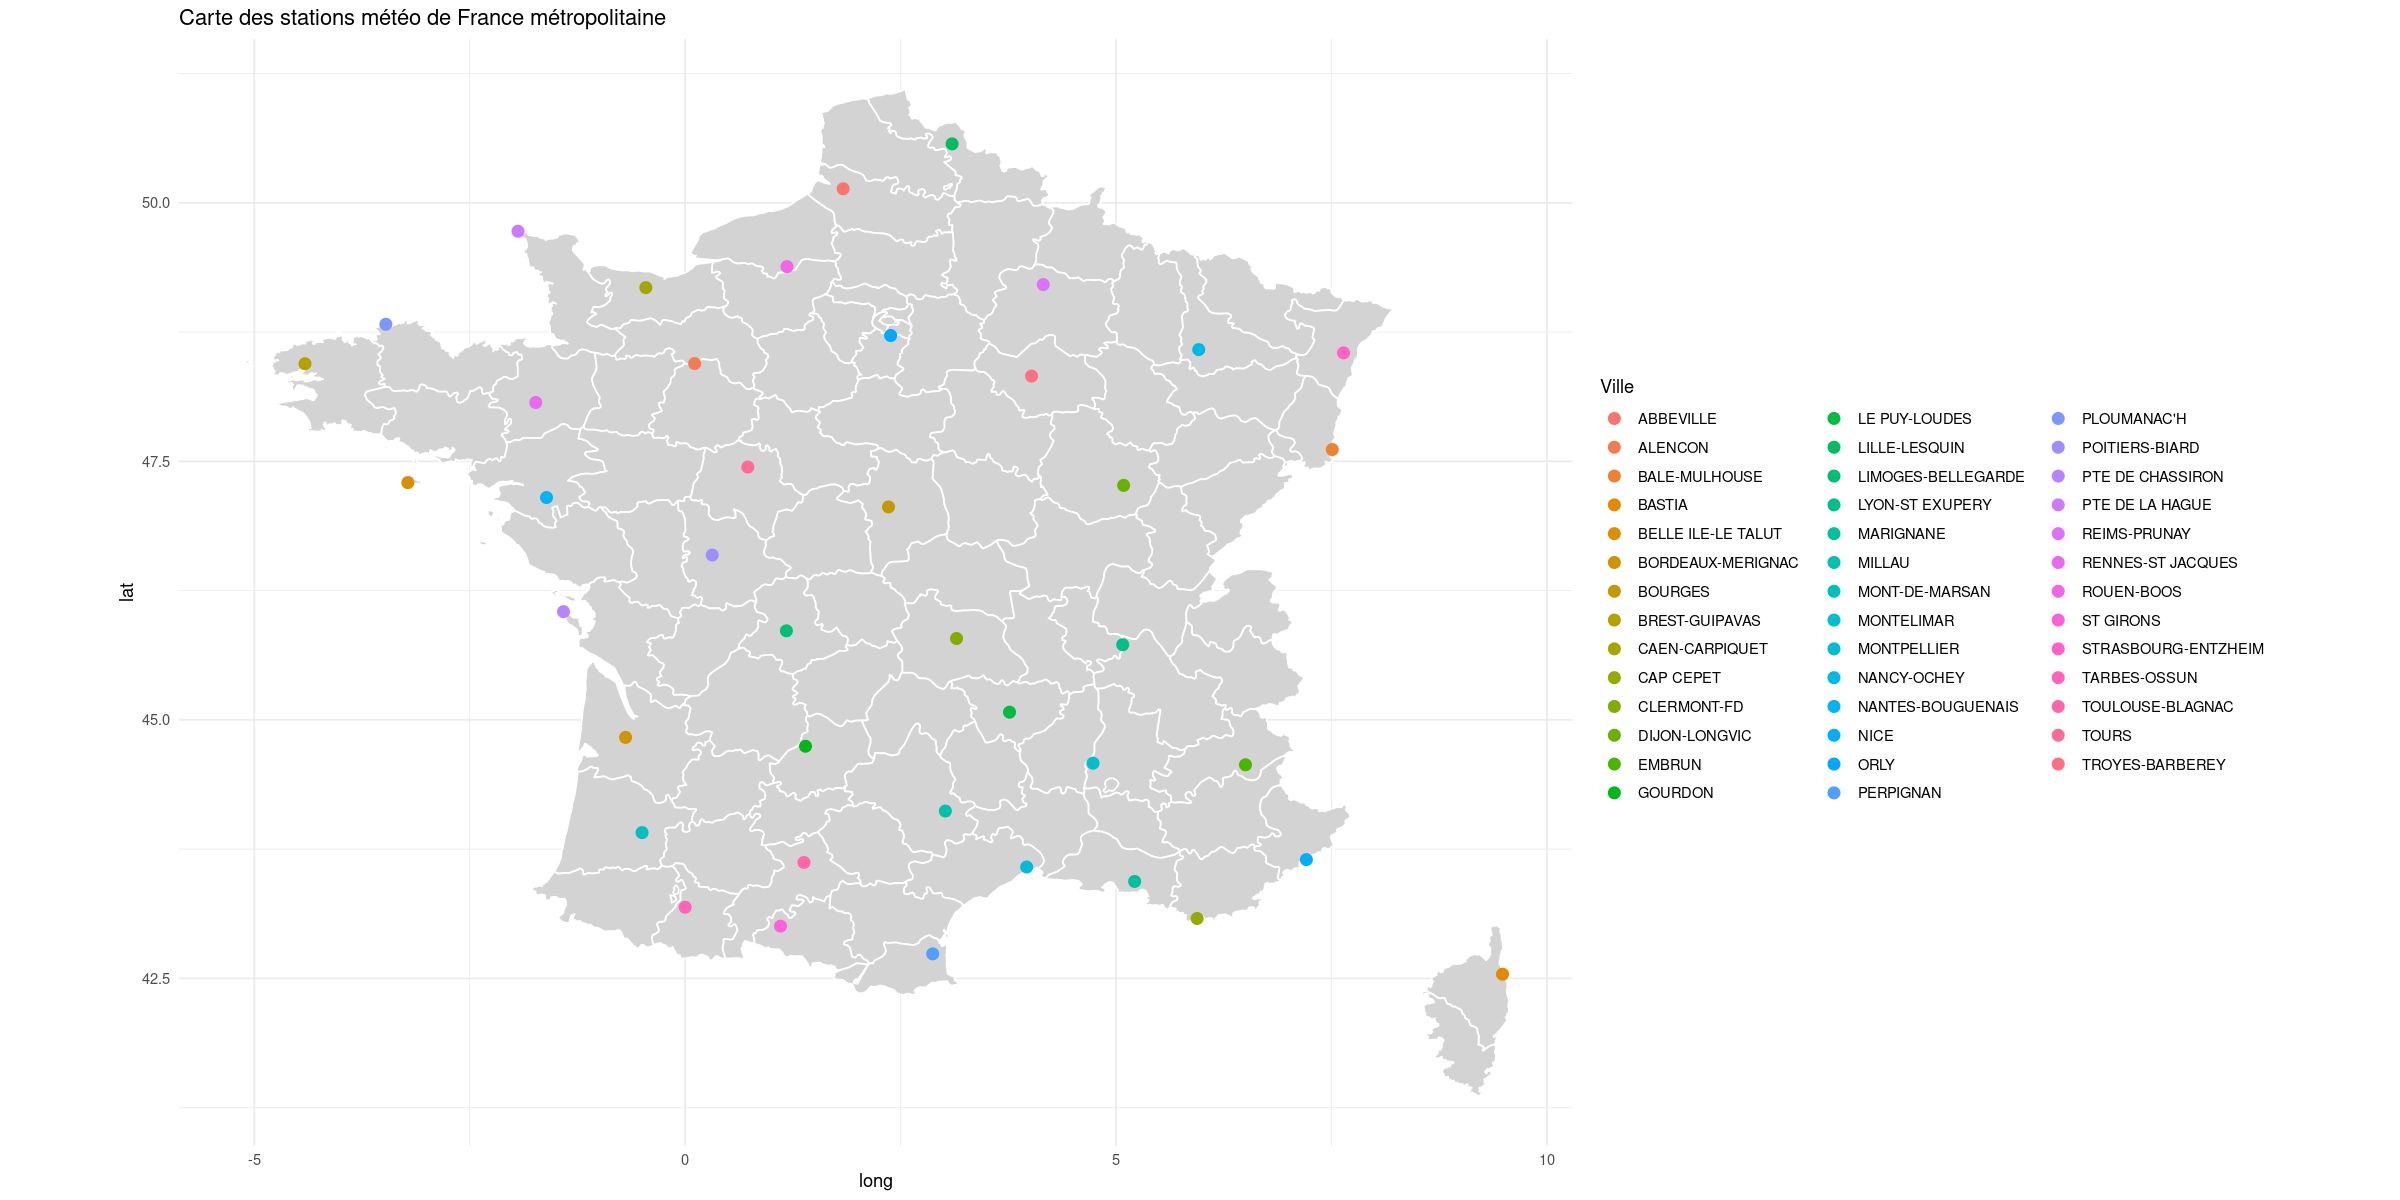

In [8]:
#install.packages(c("ggplot2", "maps", "ggmap"))
library(ggplot2)
library(maps)
library(ggmap)

options(repr.plot.width = 20, repr.plot.height = 10)

data_points <- data.frame(
  lon = df_unique_stations$Longitude,
  lat = df_unique_stations$Latitude,
  Ville = df_unique_stations$Nom
)

world <- map_data("world")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points, aes(x = lon, y = lat, color = Ville), size = 1) +
  theme_minimal() +
  theme(legend.position = "none") +
  ggtitle("Carte des stations météo")


# Zoom sur l'hexagone  
data_points_metropole <- data_points[(data_points$lat<=52)&(data_points$lat>=42)&(data_points$lon<=10)&(data_points$lon>=-10),]
france <- map_data("france")

ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = lon, y = lat, color = Ville), size = 3) +
  theme_minimal() +
  # theme(legend.position = "none") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Carte des stations météo de France métropolitaine")

### Relevé de températures par station

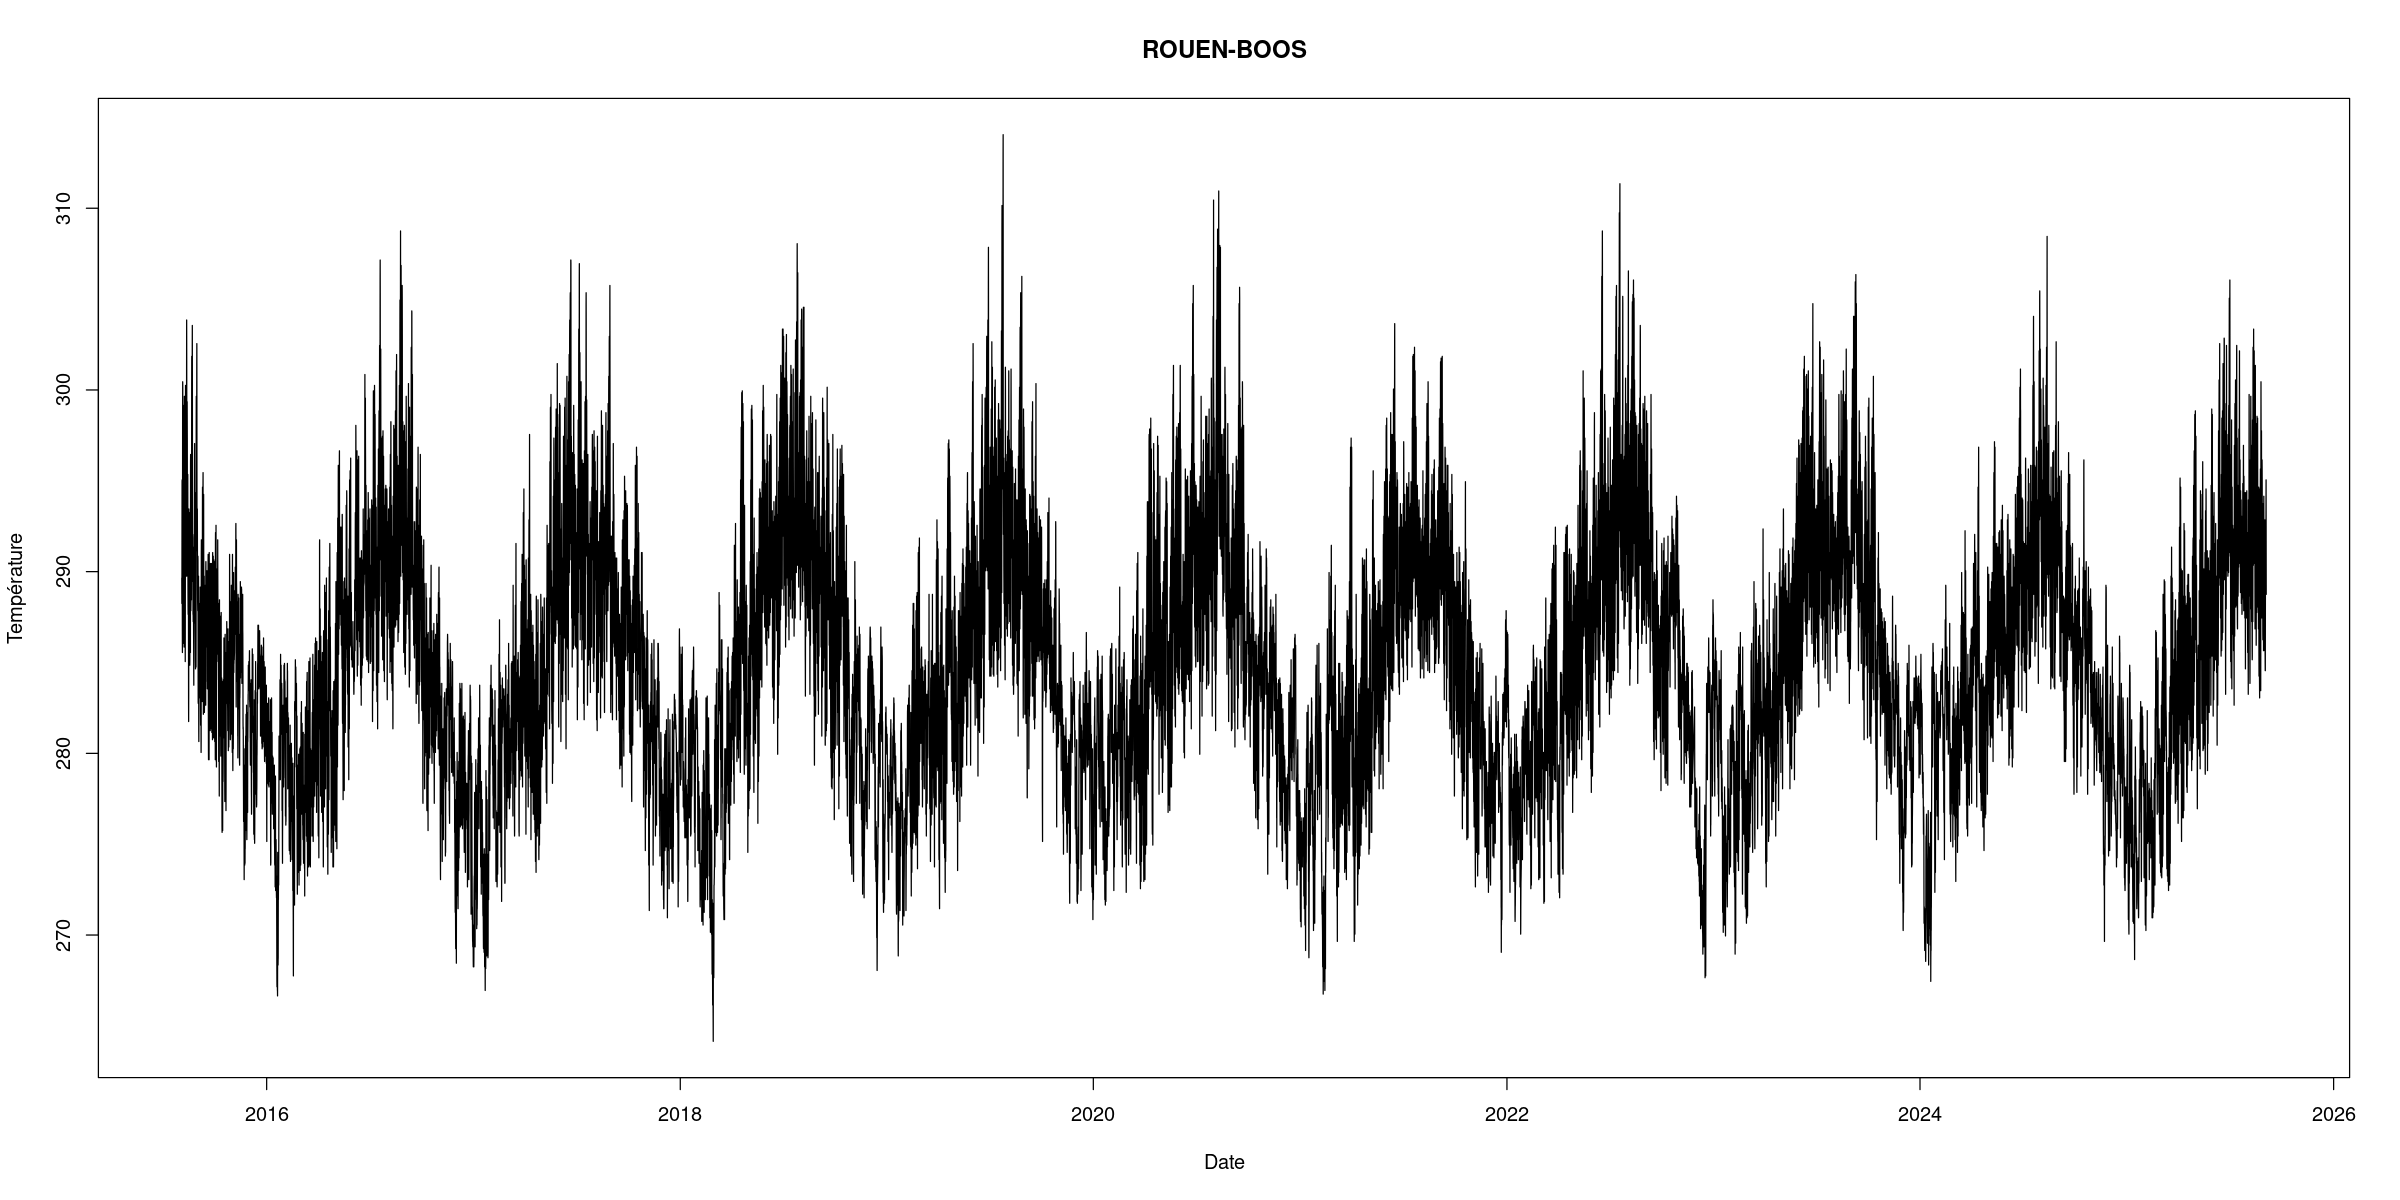

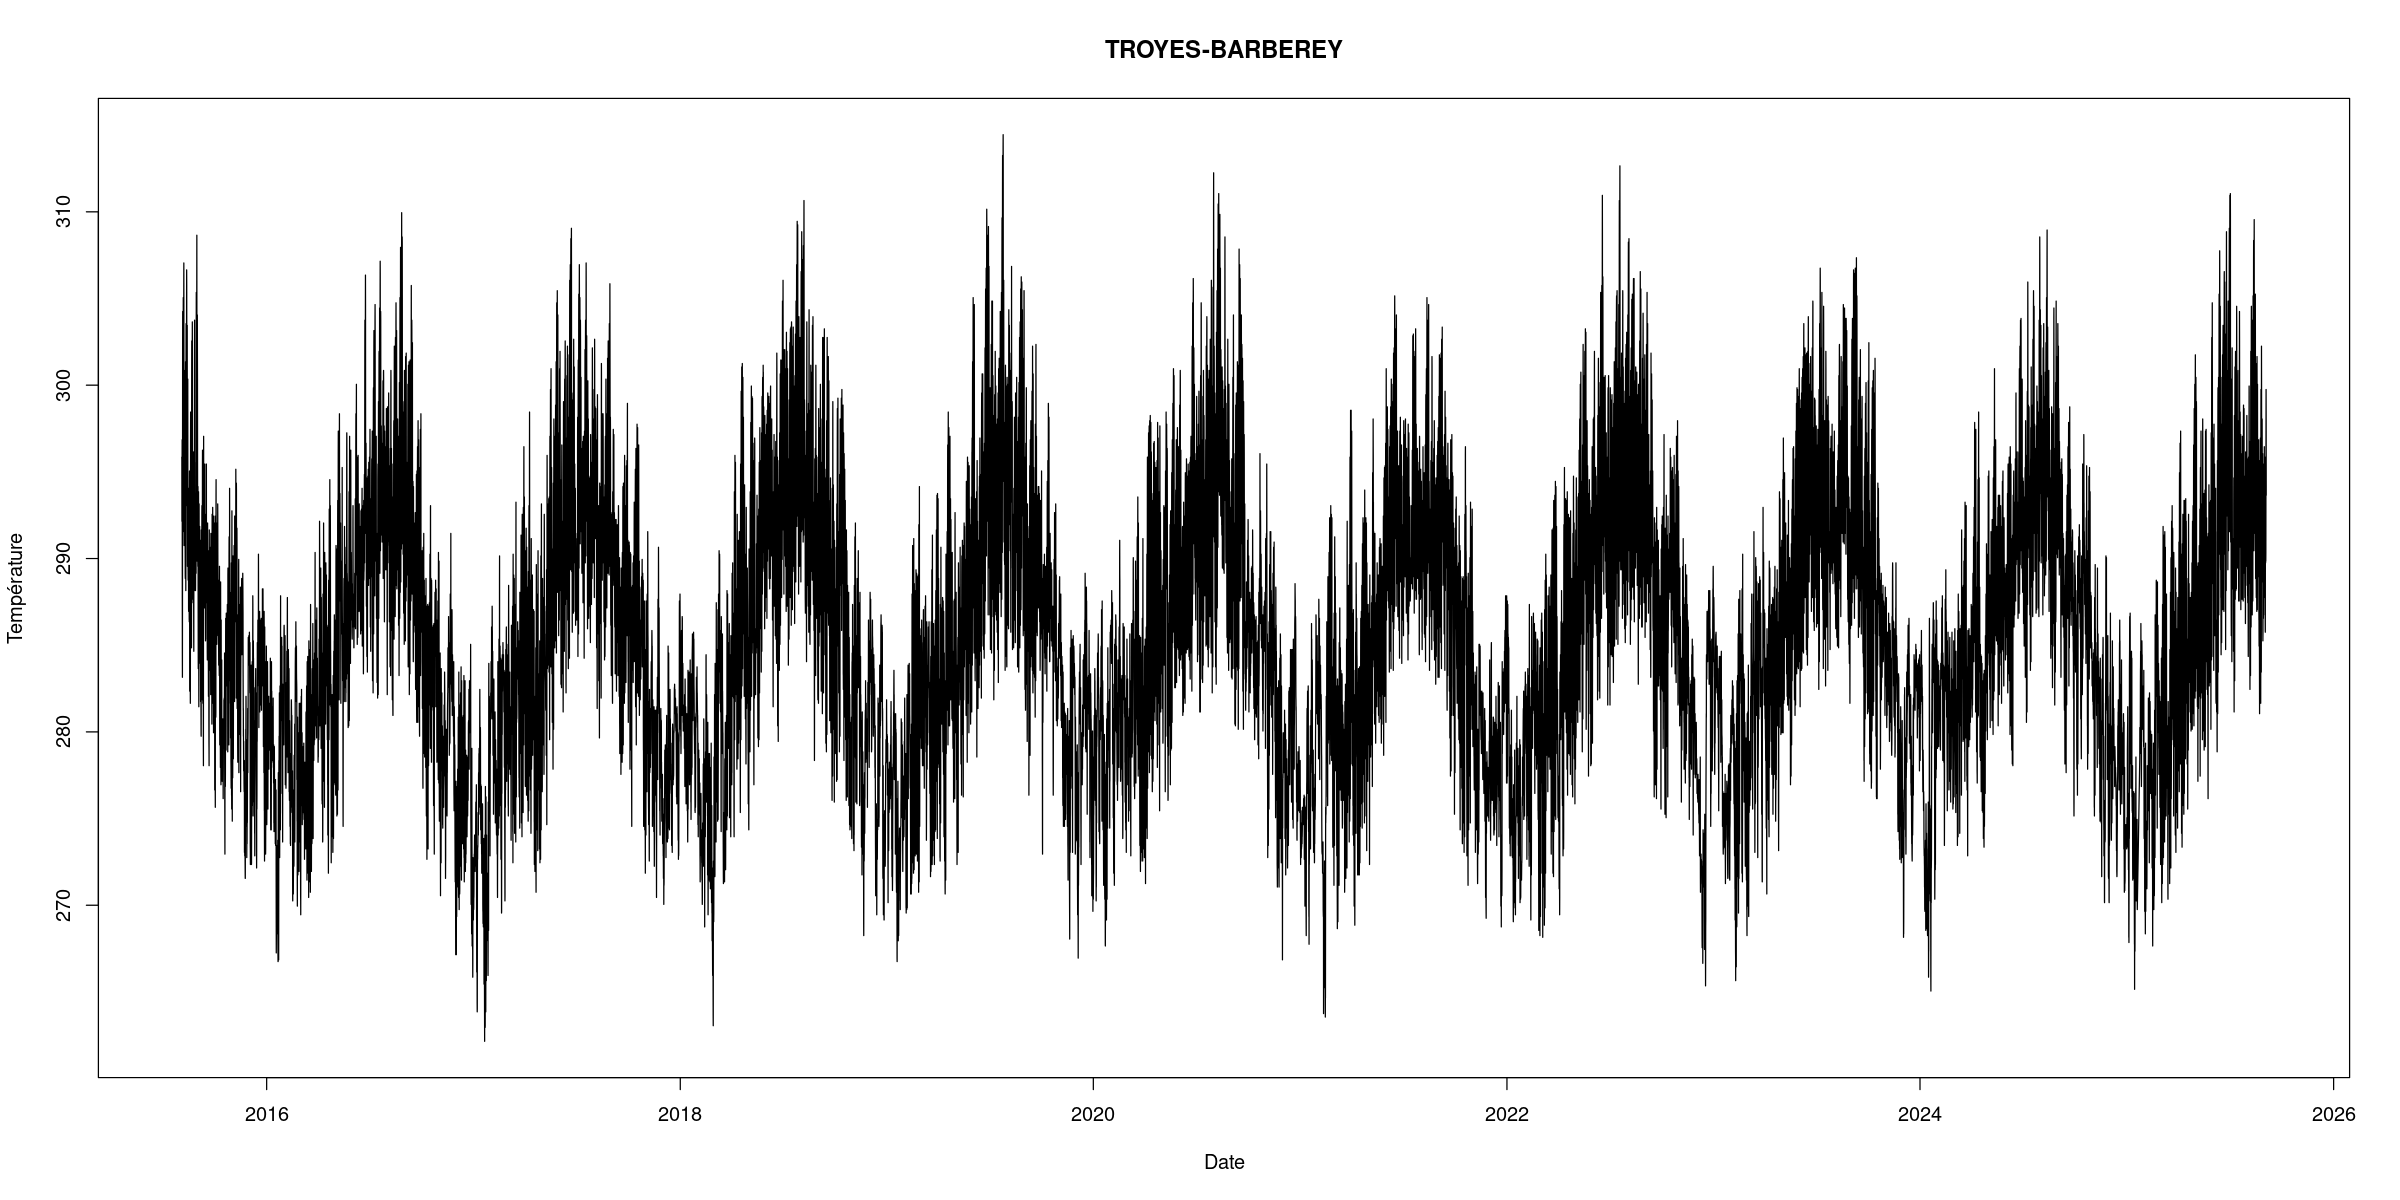

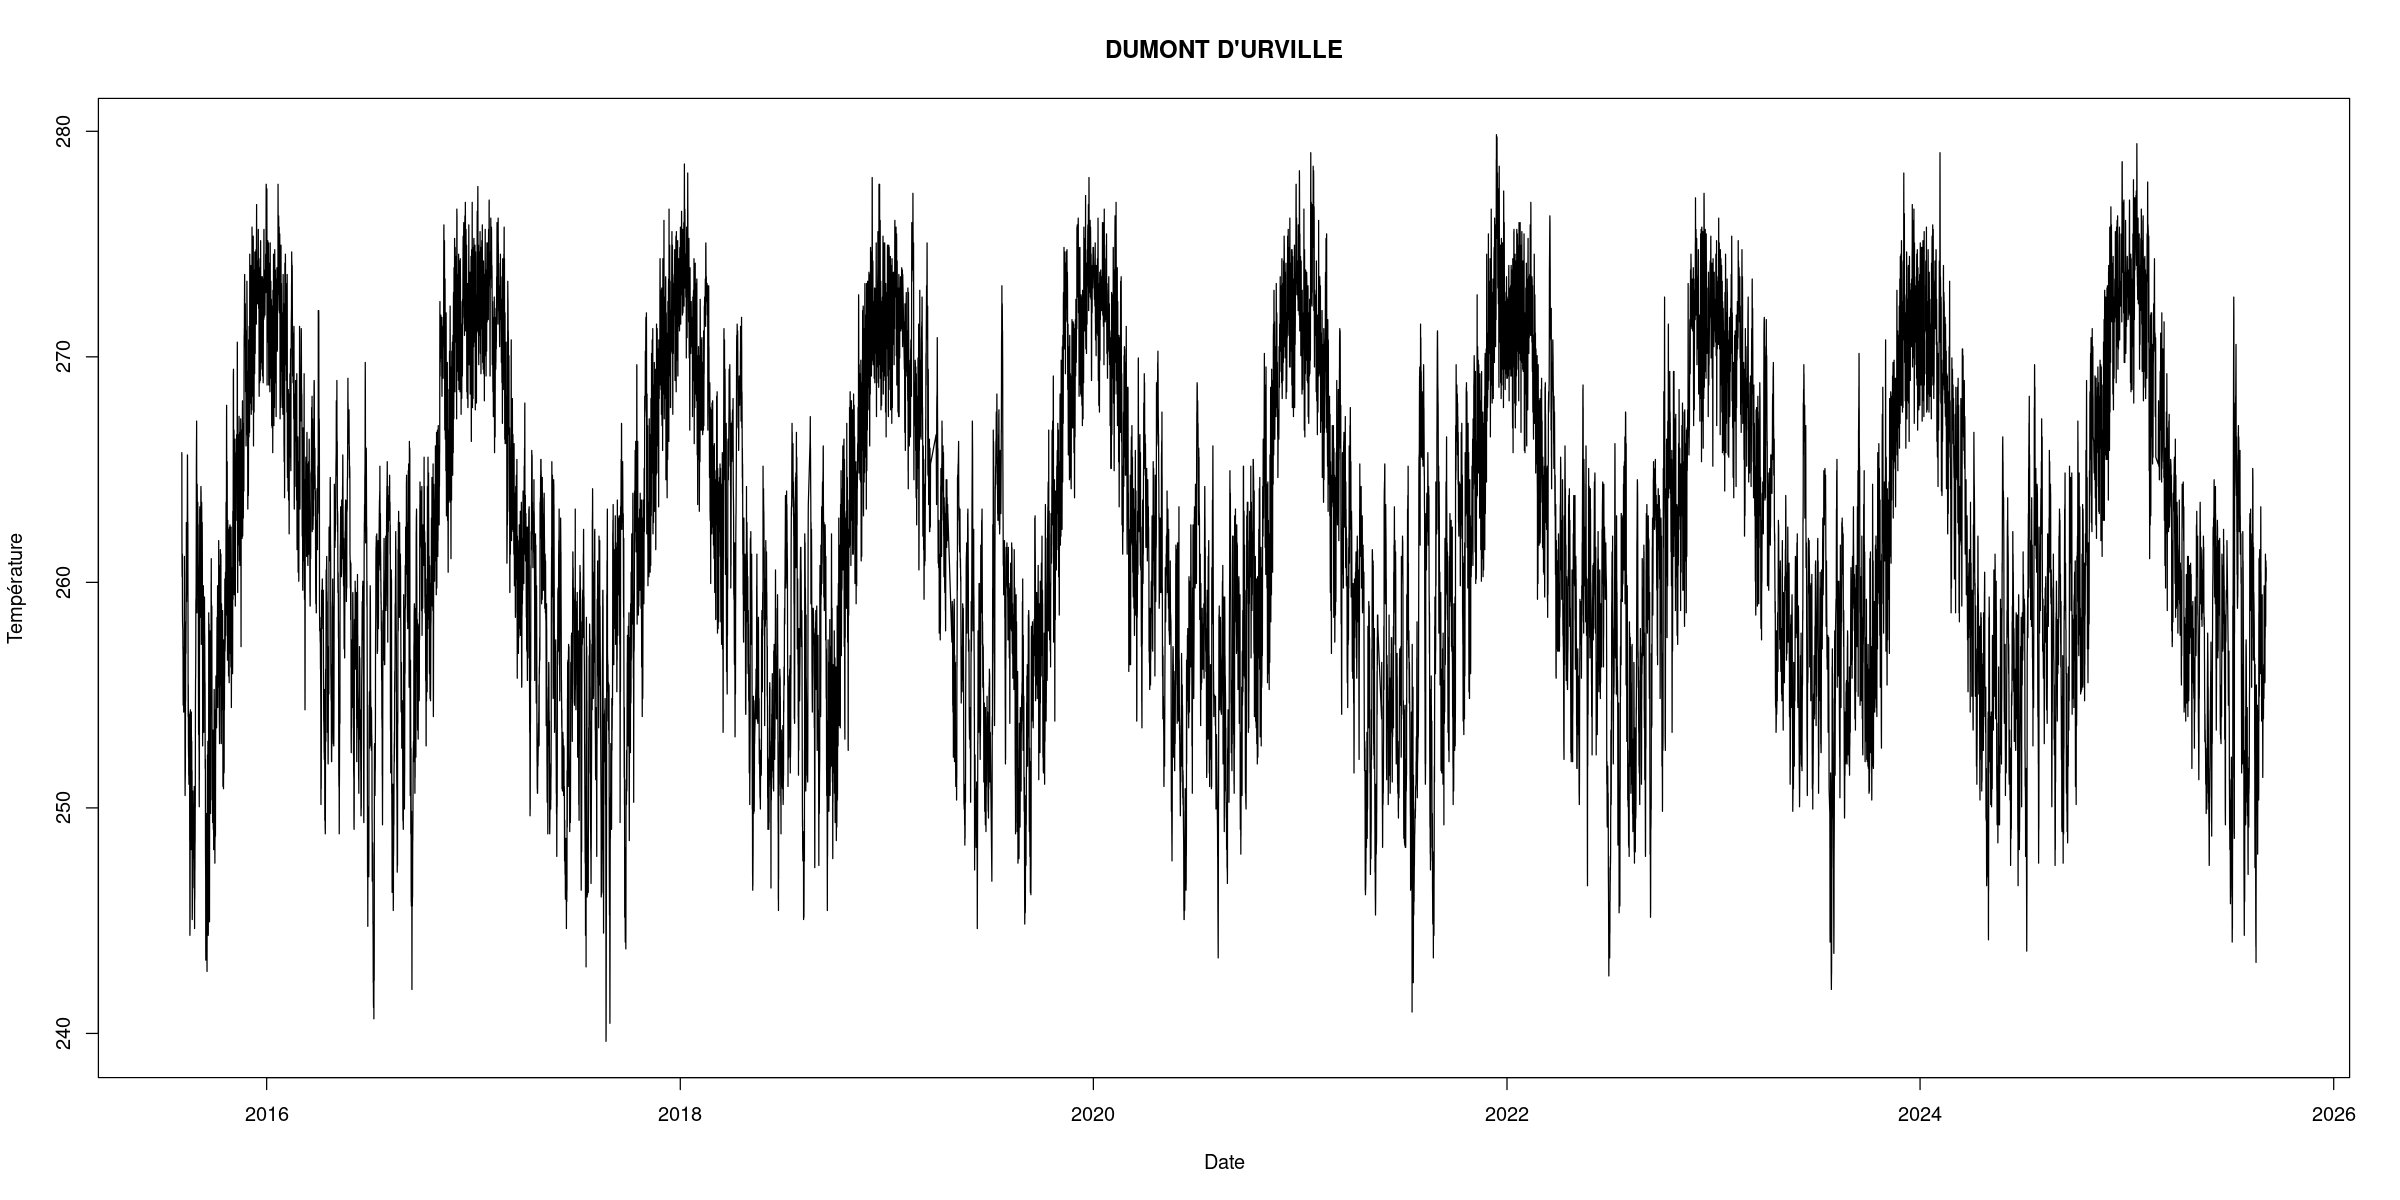

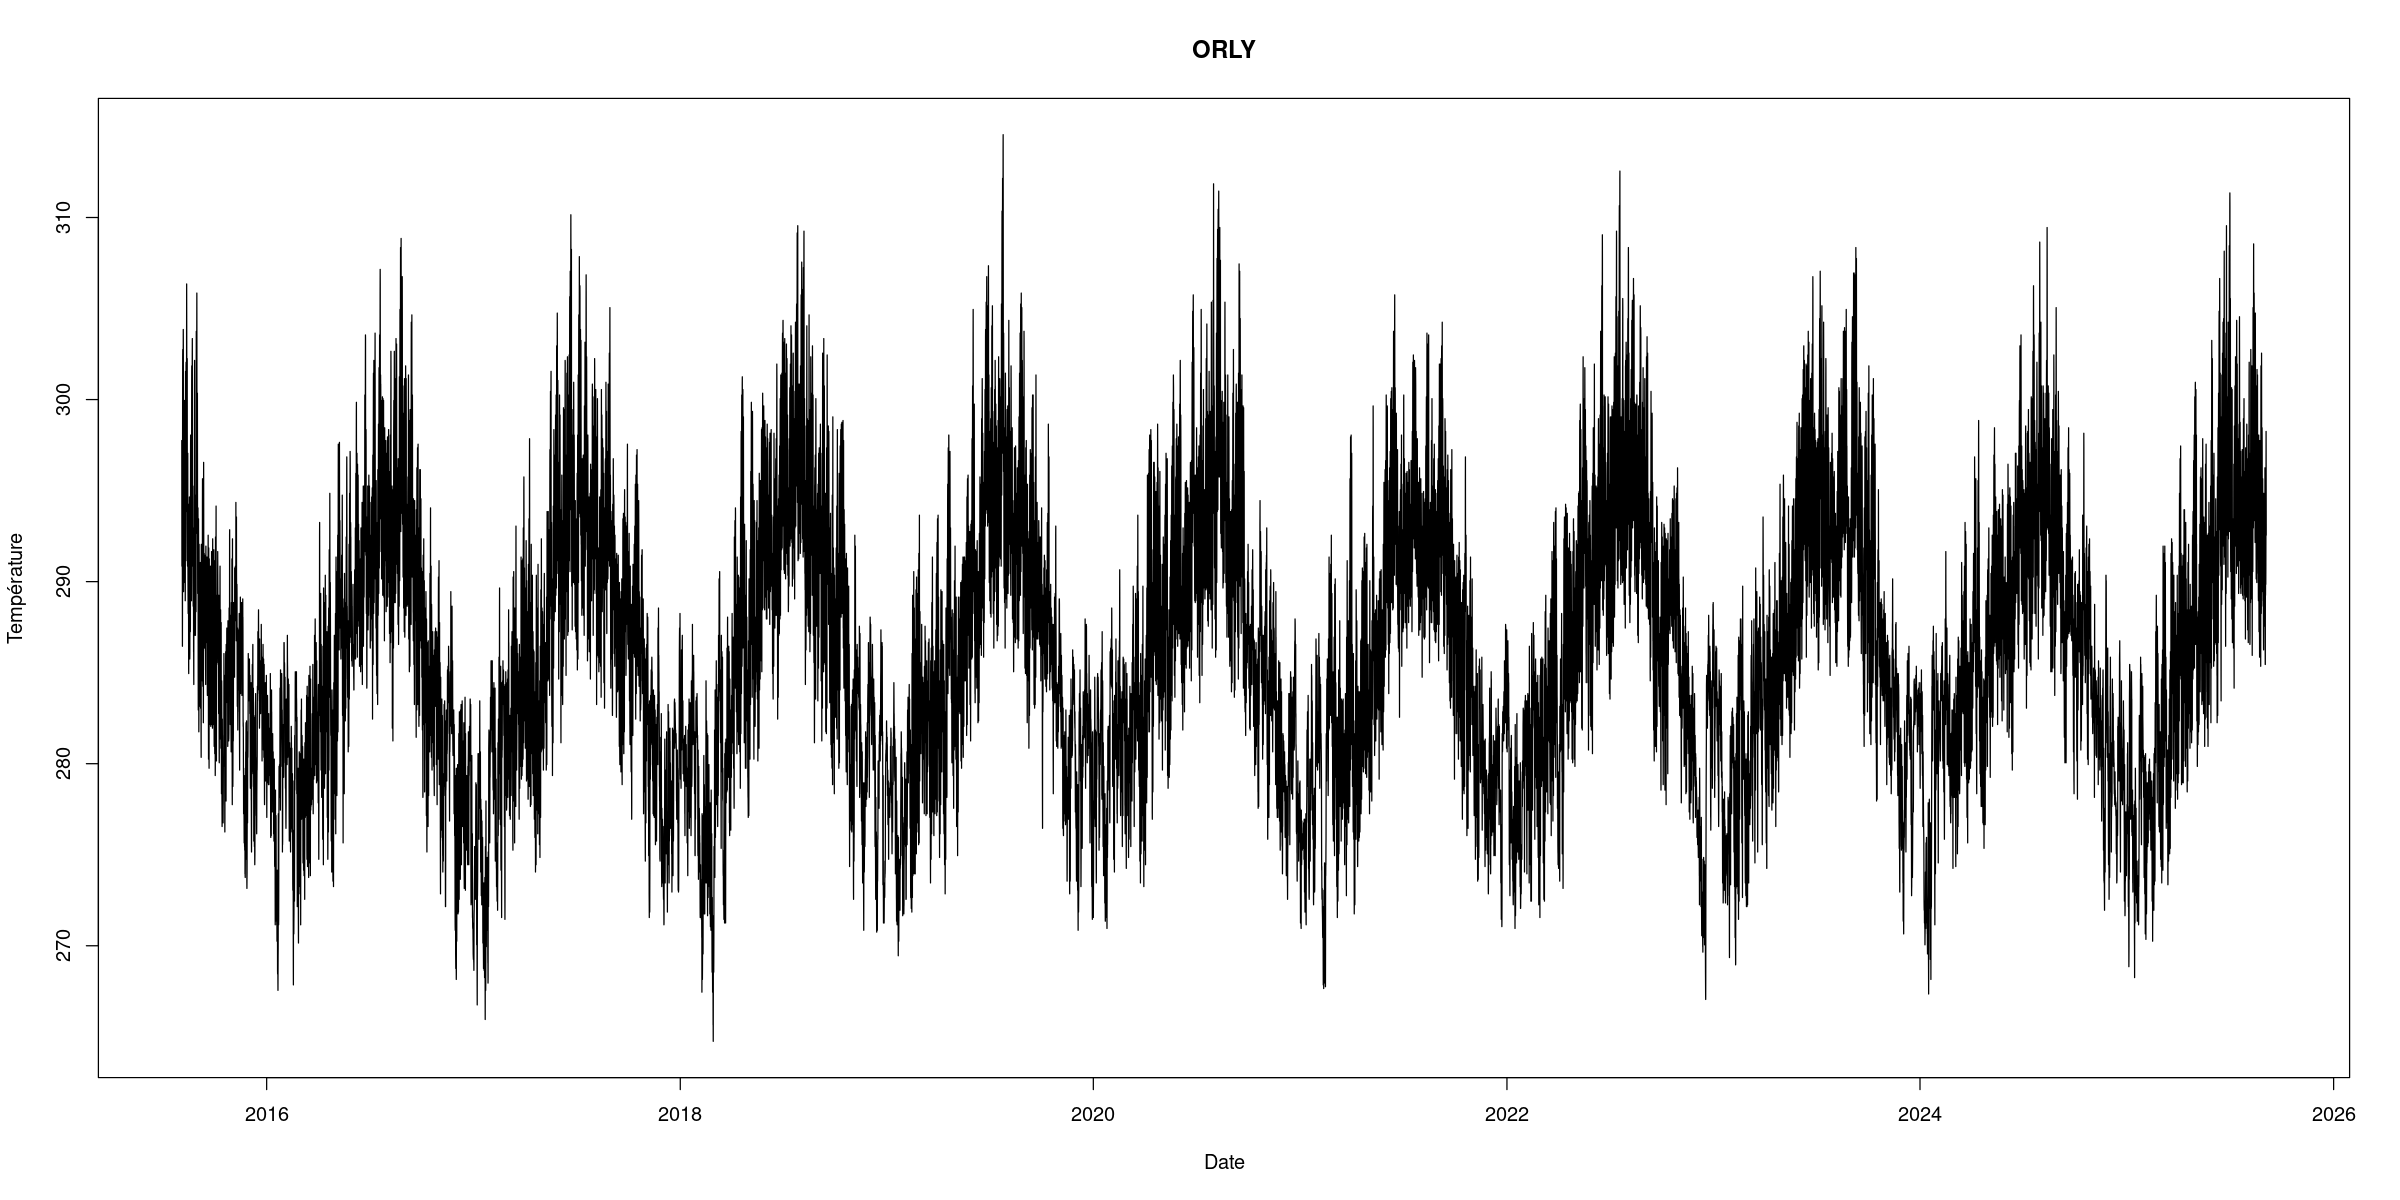

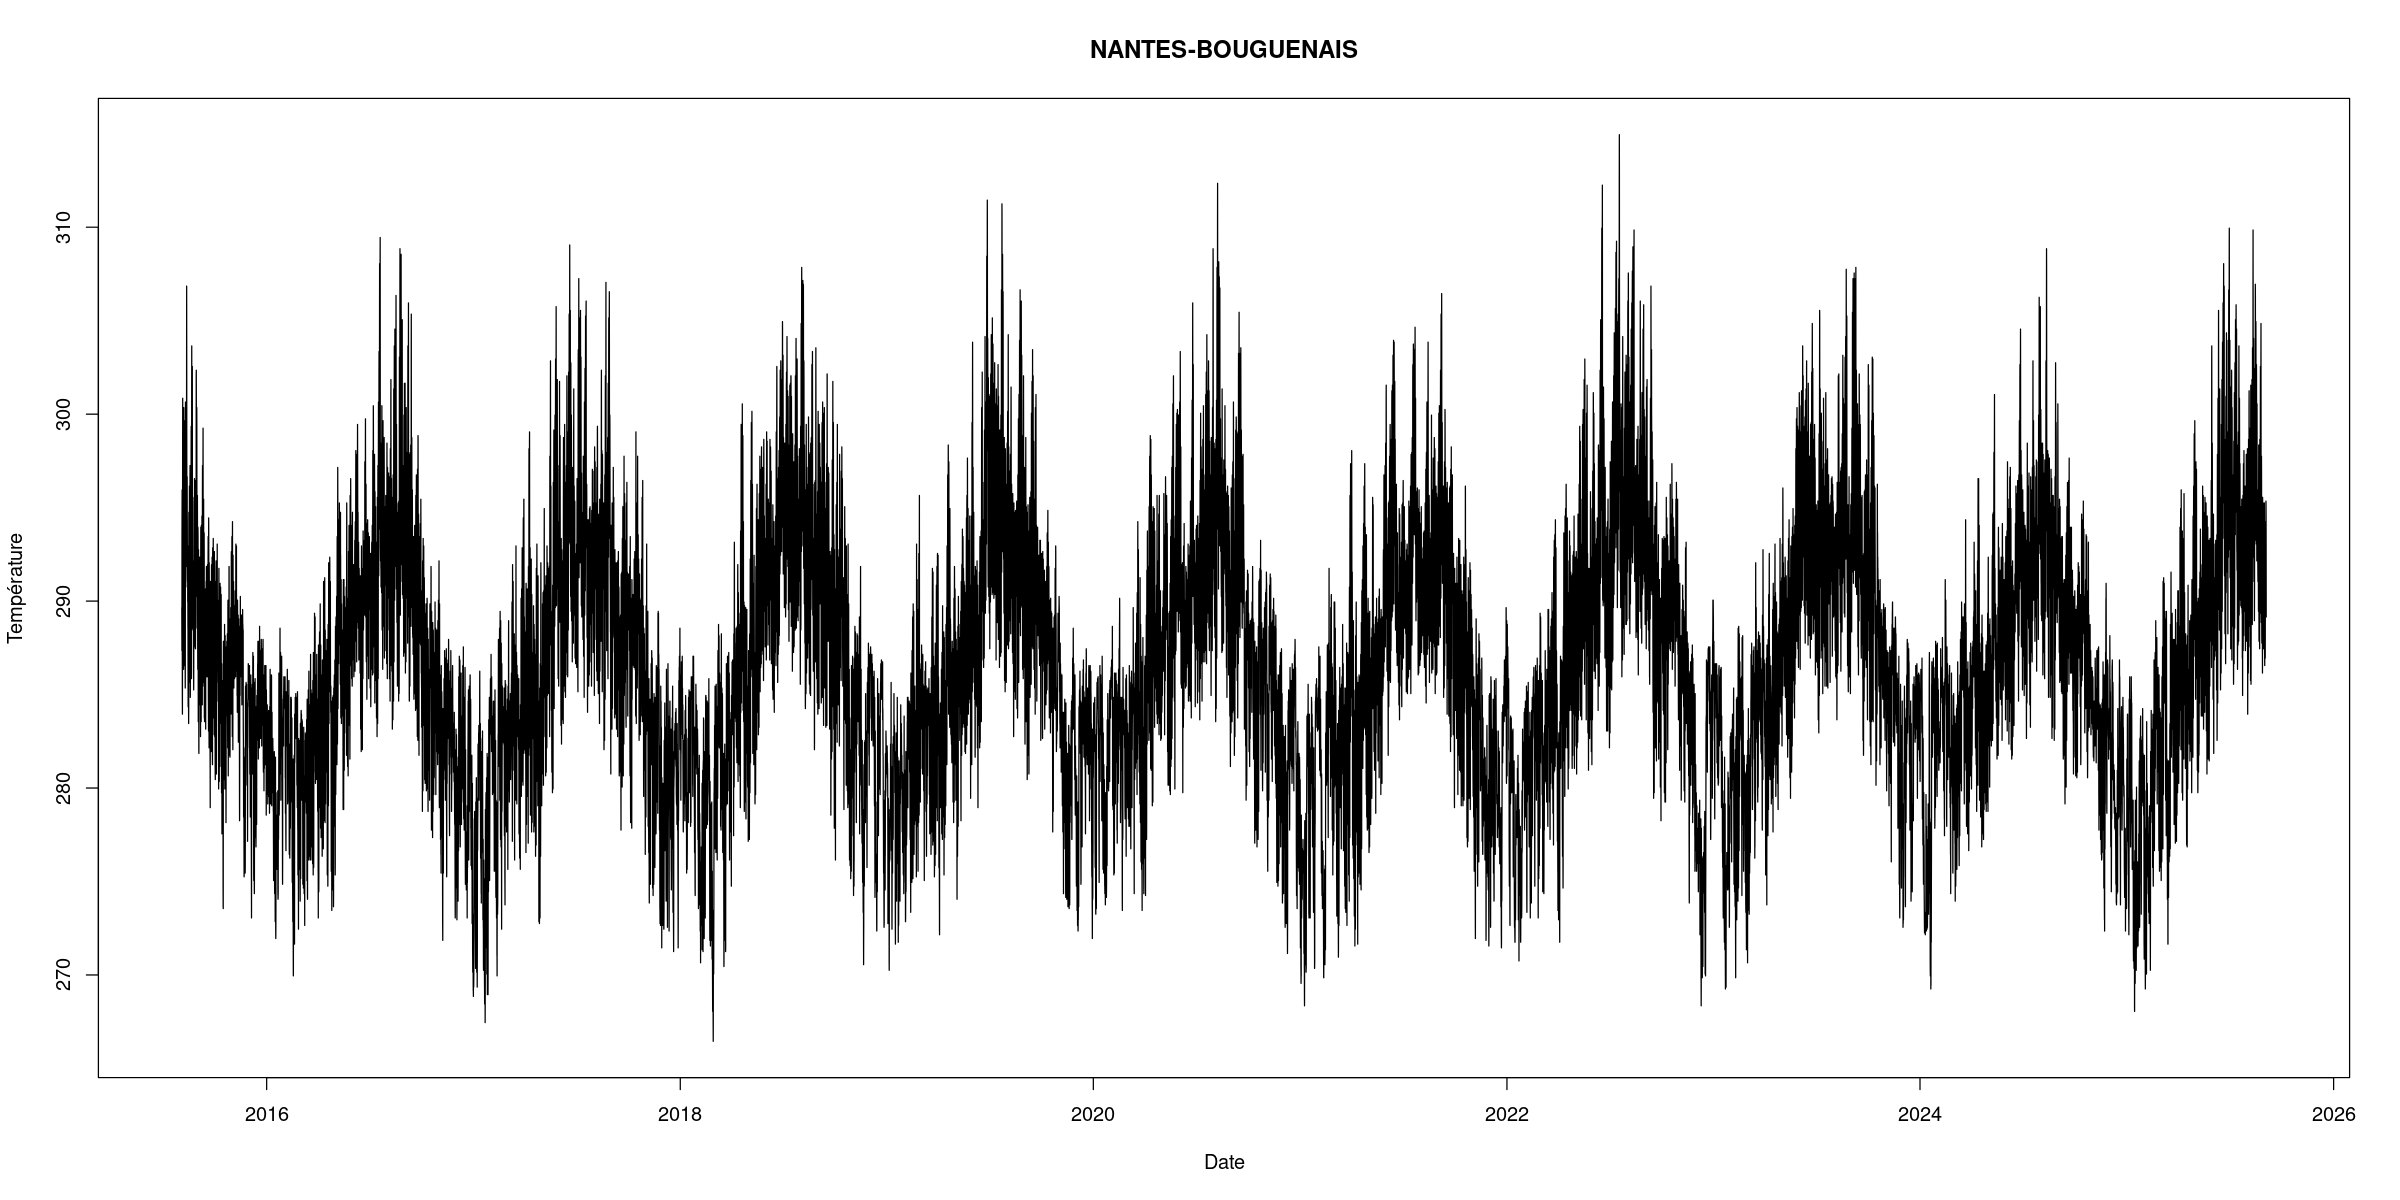

In [9]:
for (ville in unique(df_meteo$Nom)[1:5]){
  plot(
    df_meteo$Date[df_meteo$Nom==ville],
    df_meteo$`Température`[df_meteo$Nom==ville],
    xlab = "Date",
    ylab = "Température",
    main = ville,
    type = "l",
)}

### Valeurs moyennes des grandeurs mesurées par station

In [10]:
# install.packages("dplyr")
library(dplyr)

df_grouped <- df_meteo %>%
  group_by(ID.OMM.station) %>%
  summarise(n_mesures = n(),
            T_mean = mean(`Température`,na.rm = TRUE),
            T_min = min(`Température`,na.rm = TRUE),
            T_max = max(`Température`,na.rm = TRUE),
            P_mean = mean(Pression.au.niveau.mer,na.rm = TRUE),
            nebulosite_mean = mean(Nebulosité.totale, na.rm = TRUE)
            )

head(df_grouped)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ID.OMM.station,n_mesures,T_mean,T_min,T_max,P_mean,nebulosite_mean
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7005,29191,284.7995,265.65,314.35,101652.1,72.55759
7015,29365,285.1373,265.55,314.55,101631.3,96.49914
7020,29041,285.9265,270.05,305.25,101625.5,69.14118
7027,29208,285.0625,266.45,312.65,101687.4,94.13673
7037,29375,284.6429,264.15,314.05,101687.3,94.67241
7072,29387,284.8362,262.55,314.05,101703.0,97.29704


### Carte des températures extrêmes mesurées par station

In [11]:
df_station_stats <- merge(x = df_unique_stations, y = df_grouped, by = "ID.OMM.station", all = TRUE)

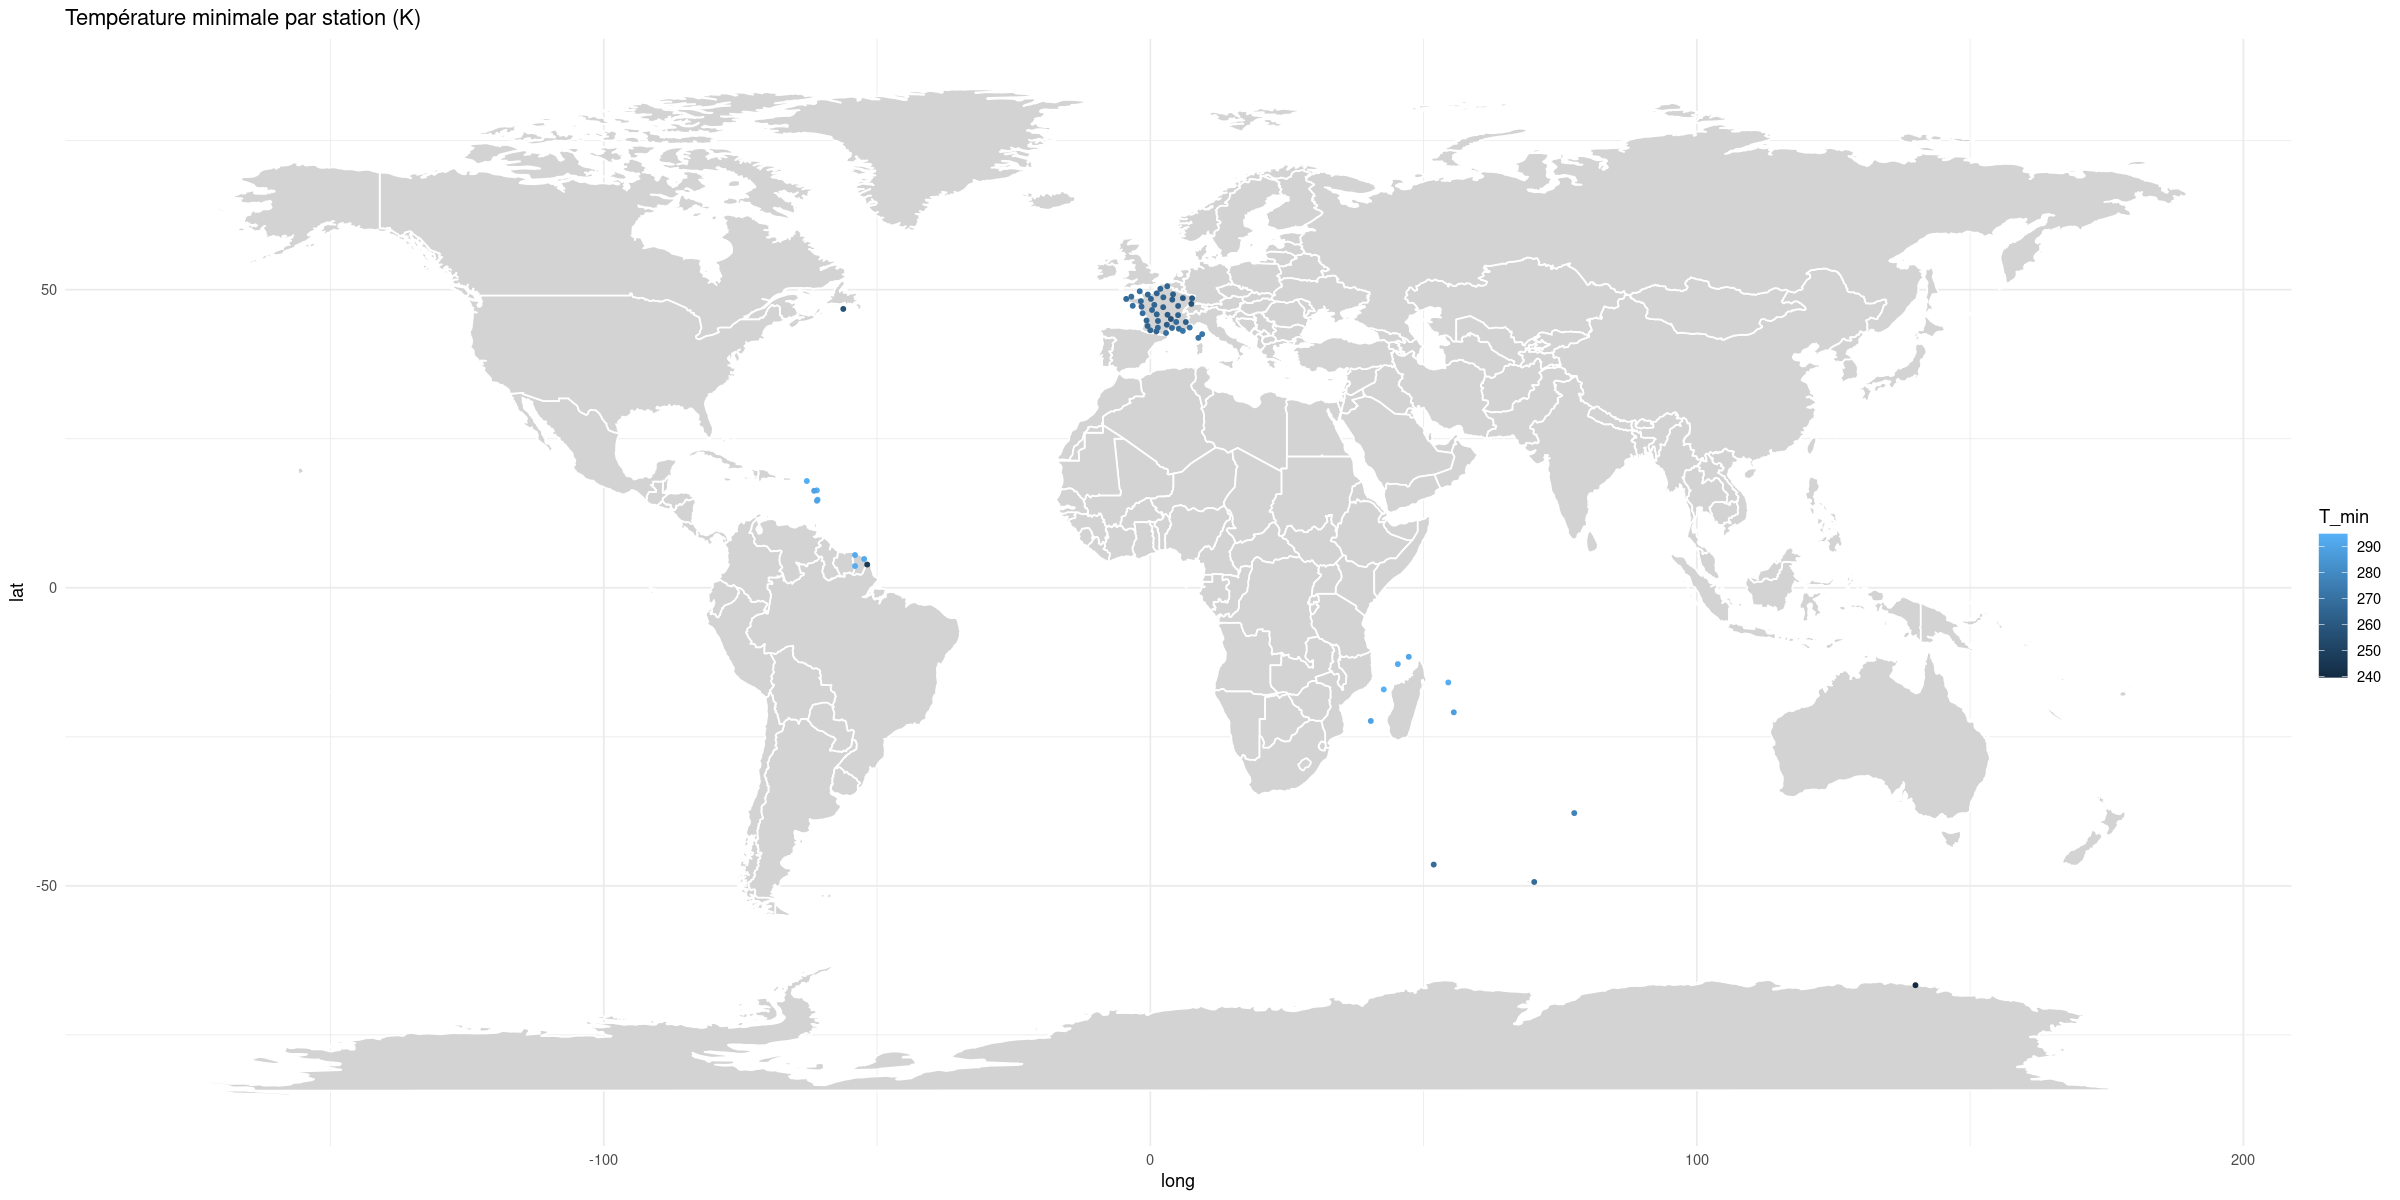

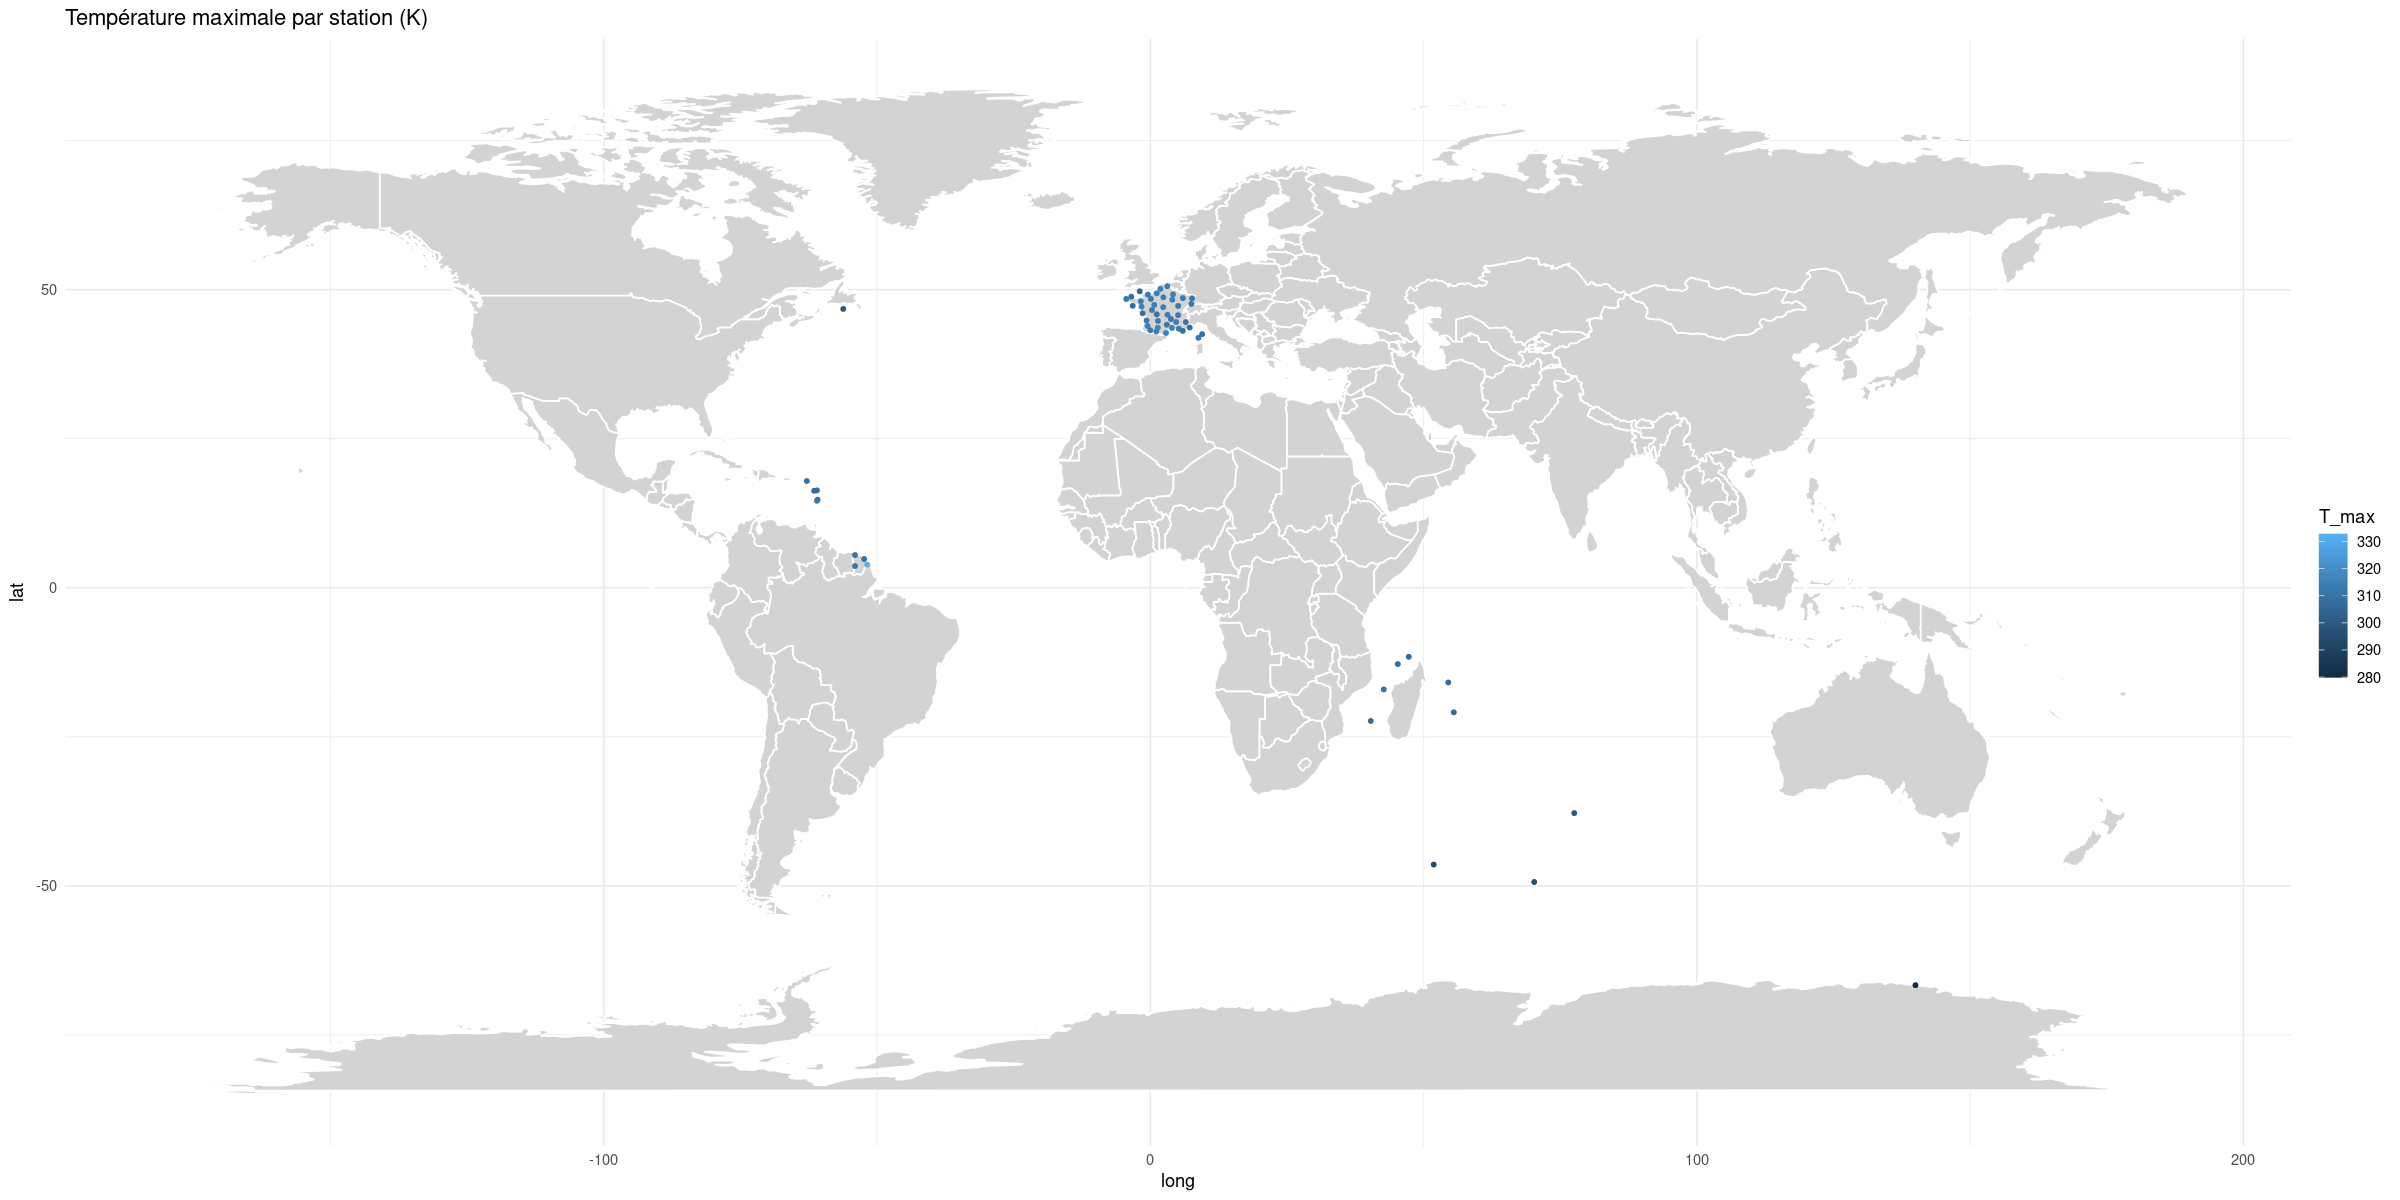

In [12]:
options(repr.plot.width = 20, repr.plot.height = 10)

world <- map_data("world")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_station_stats, aes(x = Longitude, y = Latitude, color = T_min), size = 1) +
  theme_minimal() +
  # theme(legend.position = "none")+
  ggtitle("Température minimale par station (K)")

ggplot() +
  geom_polygon(data = world, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_station_stats, aes(x = Longitude, y = Latitude, color = T_max), size = 1) +
  theme_minimal() +
  # theme(legend.position = "none")+
  ggtitle("Température maximale par station (K)")

In [12]:
summary(dataset_meteo)

: 

# 2. Un calcul et étude d'estimateur

Nous allons étudier 3 estimateurs sur le jeu de donnée météo :

$\small\textbf{Estimateur 1 : }$

Etude d'un estimateur de la température moyenne sur l'hiver 2019 en France métropolitaine.

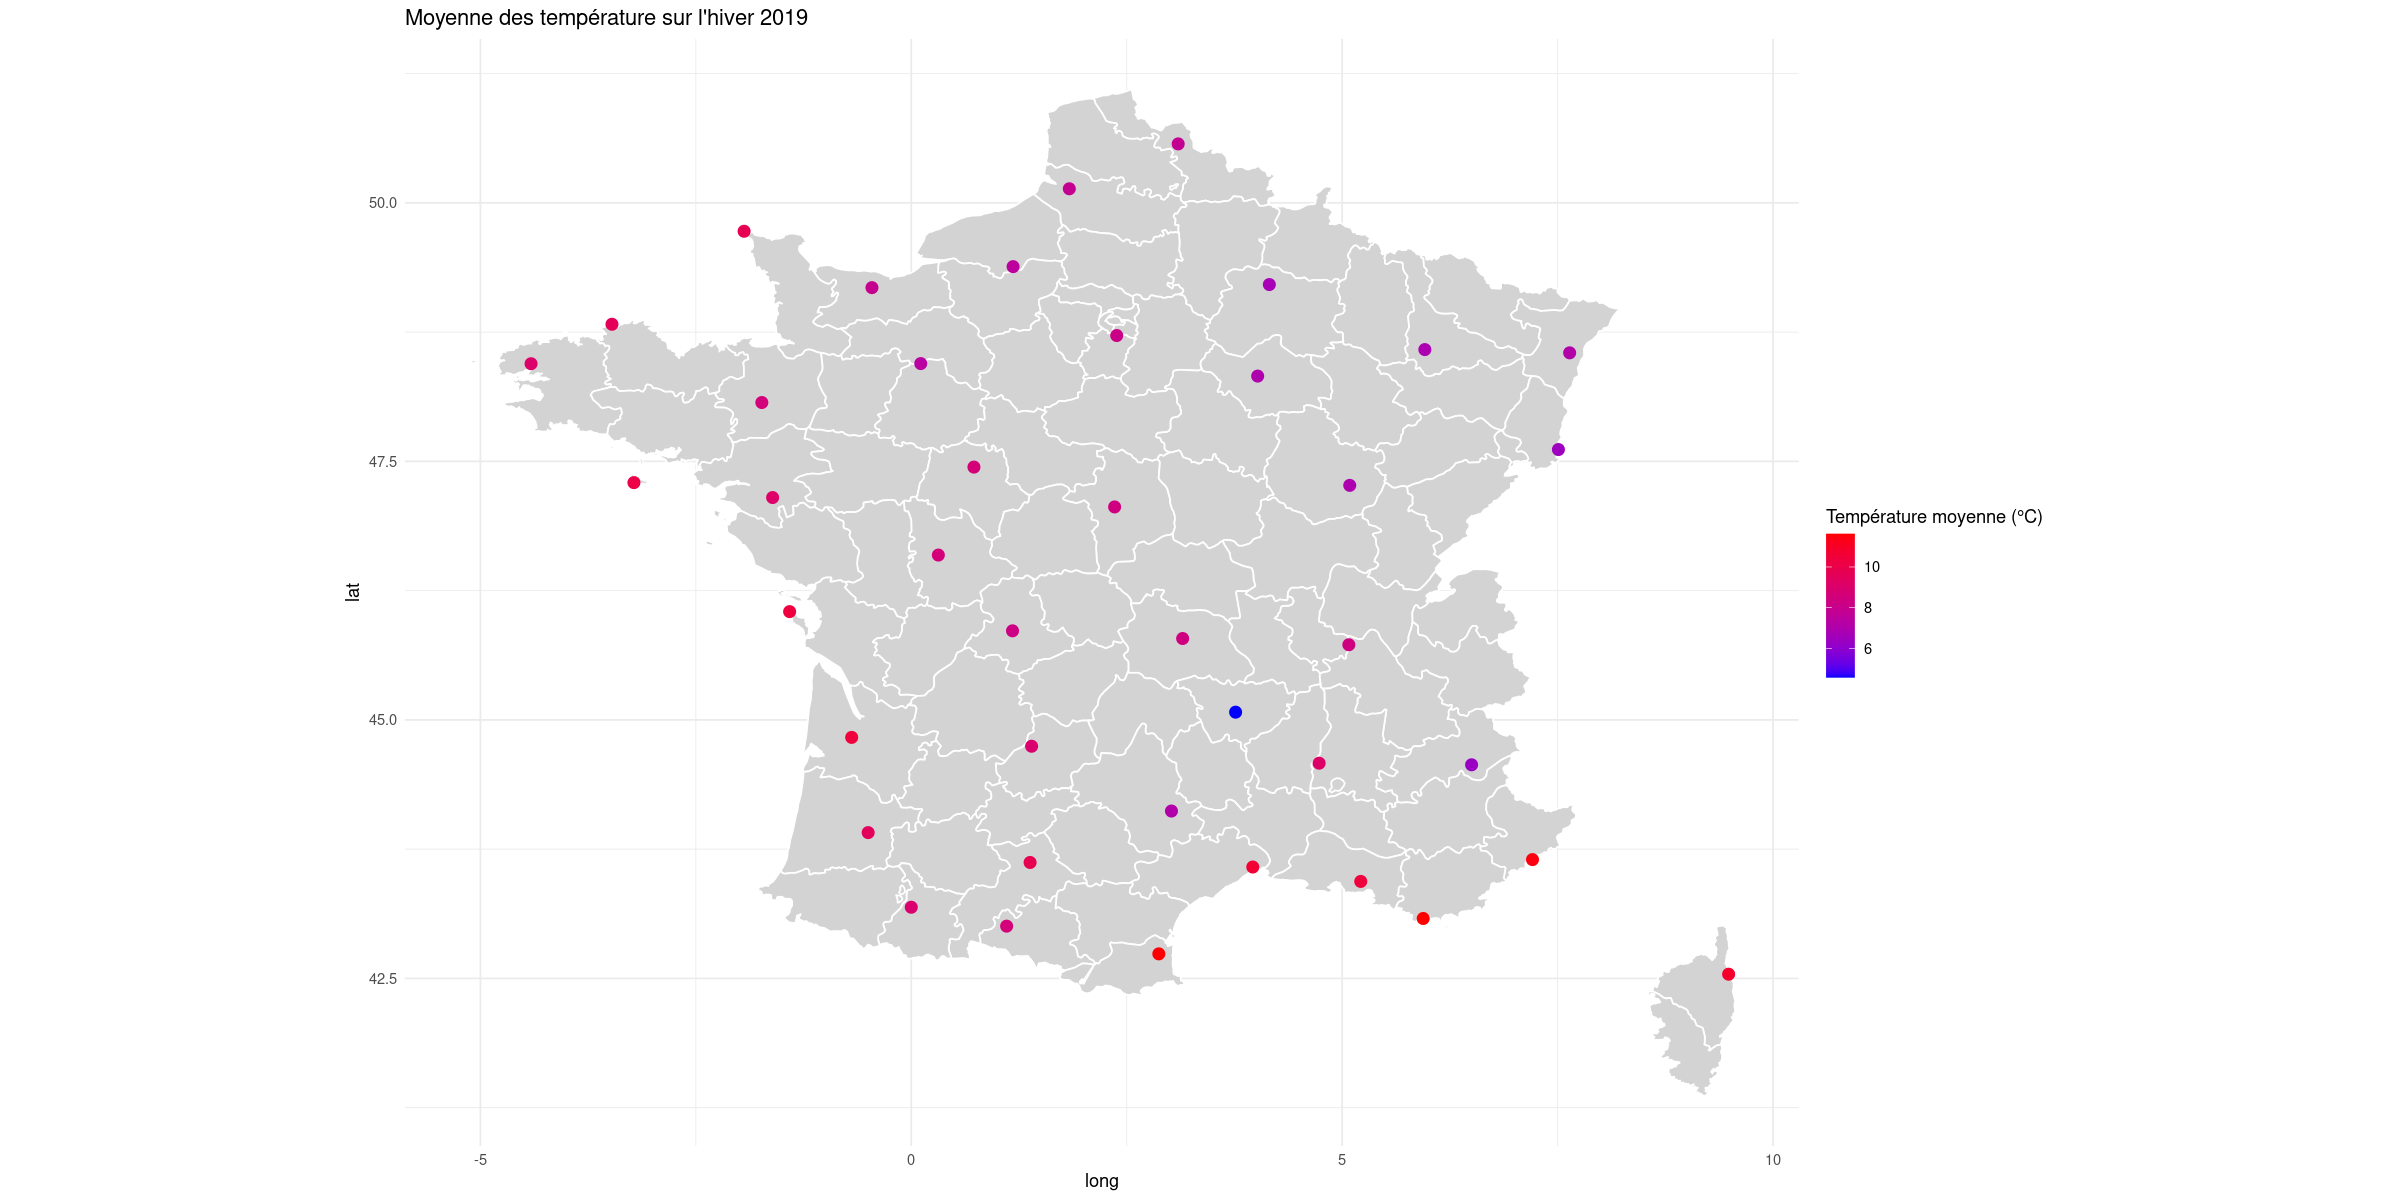

In [13]:
#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

france <- map_data("france")

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points_metropole <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(temp_moy = mean(temp, na.rm = TRUE), .groups = "drop")

#plot de la carte obtenue
ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = long, y = lat, color = temp_moy), size = 3) +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red",
                     name = "Température moyenne (°C)") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Moyenne des température sur l'hiver 2019")


Grâce à cette carte, nous pouvons voir la répartition spatiale de la température moyenne de l'hiver 2019. Nous observons que les zones géographiques au Sud sont plus chaudes que celles au Nord Est. Nous pouvons donc observer un gradient de température du Sud vers le Nord ce qui correspond empiriquement à l'idée que nous avons de la météo.

In [14]:
library(dplyr)
library(lubridate)
library(ggplot2)

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

# Paramètre : niveau de confiance
alpha <- 0.05  # pour IC à 95%

# Calculer par année : moyenne, sd, n et IC
ic_par_annee <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(
    n = sum(!is.na(temp)),
    temp_moy = mean(temp, na.rm = TRUE),
    sd_temp = sd(temp, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(n > 1) %>%
  mutate(
    se = sd_temp / sqrt(n),    # erreur standard
    ic_bas = temp_moy - sqrt(se / (alpha * n)),
    ic_haut = temp_moy + sqrt(se / (alpha * n))
  )


# Graphe avec barres d'erreur
ggplot(ic_par_annee, aes(x = station, y = temp_moy)) +
  geom_line() +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ic_bas, ymax = ic_haut), width = 0.2) +
  labs(
    title = paste0("Température moyenne annuelle et Intervalle de Confiance à ", 100*(1-alpha), "%"),
    x = "Station",
    y = "Température moyenne (°C)"
  ) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) 


ERROR: Error in library(lubridate): there is no package called ‘lubridate’


L'estimateur de la moyenne est un estimateur sans biais par construction. Nous avons donc calculé l'intervalle de confiance à 95% de cet estimateur pour chacune des stations qui dépend de l'estimateur de la variance. Nous observons un intervalle de confiance qui est plutôt précis par rapport à la valeur absolue de la moyenne. Ceci est dû au fait que nous avons beaucoup de données et donc l'intervalle de confiance est réduit.

D'après la formule : 
$
IC = \left[ \; \bar{X}_n - \sqrt{\frac{\hat{\sigma}_n^2}{\alpha n}} \; , \; 
              \bar{X}_n + \sqrt{\frac{\hat{\sigma}_n^2}{\alpha n}} \; \right]
$

$\small\textbf{Estimateur 2 : }$

Nous allons faire de même avec une estimation des précipitations moyennes en France métropolitaine sur l'hiver 2019.

In [ ]:
#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  pluie = df_meteo$`Précipitations.dans.la.dernière.heure`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

france <- map_data("france")

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points_metropole <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(pluie_moy = mean(pluie, na.rm = TRUE), .groups = "drop")

#plot de la carte obtenue
ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = data_points_metropole, aes(x = long, y = lat, color = pluie_moy), size = 3) +
  theme_minimal() +
  scale_color_gradient(low = "blue", high = "red",
                     name = "Précipitation (mm)") +
  coord_fixed(ratio = 1.2)+
  ggtitle("Moyenne des précipitations sur l'hiver 2019")


Grâce à cette carte et à l'estimation des précipitations, nous pouvons observer les régions où il a le plus plu durant l'hiver 2019. Nous observons que la Bretagne est une région où il a particulièrement plu durant cet hiver ce qui confirme aussi la croyance populaire...

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  pluie = df_meteo$`Précipitations.dans.la.dernière.heure`,
  station = df_meteo$Nom,
  mois = df_meteo$mois_de_l_annee,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

# Paramètre : niveau de confiance
alpha <- 0.05  # pour IC à 95%

# Calculer par année : moyenne, sd, n et IC
ic_par_annee <- data_points %>%
  filter(lat <= 52, lat >= 42,
         long <= 10, long >= -10,
         date < "2020-01-01", date > "2019-01-01",
         mois > 1, mois < 4) %>%
  group_by(station, lat, long) %>%
  summarise(
    n = sum(!is.na(pluie)),
    pluie_moy = mean(pluie, na.rm = TRUE),
    sd_pluie = sd(pluie, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(n > 1) %>%
  mutate(
    se = sd_pluie / sqrt(n),    # erreur standard
    ic_bas = pluie_moy - sqrt(se / (alpha * n)),
    ic_haut = pluie_moy + sqrt(se / (alpha * n))
  )


# Graphe avec barres d'erreur
ggplot(ic_par_annee, aes(x = station, y = pluie_moy)) +
  geom_line() +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ic_bas, ymax = ic_haut), width = 0.2) +
  labs(
    title = paste0("Précipations moyennes annuelles et Intervalle de Confiance à ", 100*(1-alpha), "%"),
    x = "Station",
    y = "Précipitation moyenne (°C)"
  ) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1)) 


Nous avons aussi tracé l'intervalle de confiance pour l'estimateur de la précipitation moyenne. Nous observons une plus grande disparité dans les données de par leur variance plus grande et leur plus faible nombre par rapport à la température vu plus tôt. Nous pouvons donc en déduire que l'estimateur de la précipitation moyenne est plus suceptible d'être moins précis que celui de la température.

$\small\textbf{Estimateur 3 : }$

Nous allons finir par estimer la température moyenne en France métropolitaine sur une année.

In [ ]:
#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points <- data_points%>%
  mutate(annee = year(date))
data_points <- data_points %>%
  group_by(annee) %>%
  summarise(temp_moy = mean(temp, na.rm = TRUE), .groups = "drop")

#plot du graphe obtenu
ggplot(data_points, aes(x = annee, y = temp_moy)) +
  geom_line(color = "blue", size = 1) +
  geom_point(color = "red", size = 2) +
  labs(
    title = "Évolution de la température moyenne annuelle",
    x = "Année",
    y = "Température moyenne (°C)"
  ) +
  theme_minimal()

Grâce à ce graphe nous étudions l'évolution de la température moyenne annuelle de 2015 à 2025. Nous observons une tendance croissante de cette température moyenne annuelle. Nous confirmons donc un des effets du réchauffement climatique :  l'augmentation de la température en France métropolitaine depuis 10 ans. 

In [ ]:
library(dplyr)
library(lubridate)
library(ggplot2)

# Paramètre : niveau de confiance
alpha <- 0.05  # pour IC à 95%

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = df_meteo$Date,
  temp = df_meteo$`Température...C.`,
  lat = df_meteo$Latitude,
  long = df_meteo$Longitude
)

# Calculer par année : moyenne, sd, n et IC t
ic_par_annee <- data_points %>%
  mutate(annee = year(date)) %>%
  group_by(annee) %>%
  summarise(
    n = sum(!is.na(temp)),
    temp_moy = mean(temp, na.rm = TRUE),
    sd_temp = sd(temp, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    se = sd_temp / sqrt(n),
    ic_bas = temp_moy - sqrt(se / (alpha * n)),
    ic_haut = temp_moy + sqrt(se / (alpha * n))
  )

# Graphe avec barres d'erreur
ggplot(ic_par_annee, aes(x = annee, y = temp_moy)) +
  geom_line() +
  geom_point(size = 2) +
  geom_errorbar(aes(ymin = ic_bas, ymax = ic_haut), width = 0.2) +
  labs(
    title = paste0("Température moyenne annuelle et IC (", 100*(1-alpha), "%)"),
    x = "Année",
    y = "Température moyenne (°C)"
  ) +
  theme_minimal()

Nous avons retracé le même graphe qu'au dessus en ajoutant les intervalles de confiance. Dû au grand nombre de données sur l'année, nous avons un intervalle de confiance très petit. Nous sommes donc ici sur un estimateur très précis.

# 3. Des tests statistiques (au moins un sur un paramètre et une ANOVA)

Colin

In [6]:
# on reprend : dataset_meteo
colnames(dataset_meteo)

[1] "ID OMM station"                                           
 [2] "Date"                                                     
 [3] "Pression au niveau mer"                                   
 [4] "Variation de pression en 3 heures"                        
 [5] "Type de tendance barométrique"                            
 [6] "Direction du vent moyen 10 mn"                            
 [7] "Vitesse du vent moyen 10 mn"                              
 [8] "Température"                                              
 [9] "Point de rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité horizontale"                                   
[12] "Temps présent"                                            
[13] "Temps passé 1"                                            
[14] "Temps passé 2"                                            
[15] "Nebulosité totale"                                        
[16] "Nébulosité  des nuages de l' étage inférieur"             
[17] "Hauteur de la base des nuages de l'étage inférieur"       
[18] "Type des nuages de l'étage inférieur"                     
[19] "Type des nuages de l'étage moyen"                         
[20] "Type des nuages de l'étage supérieur"                     
[21] "Pression station"                                         
[22] "Niveau barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation de pression en 24 heures"                       
[25] "Température minimale sur 12 heures"                       
[26] "Température minimale sur 24 heures"                       
[27] "Température maximale sur 12 heures"                       
[28] "Température maximale sur 24 heures"                       
[29] "Température minimale du sol sur 12 heures"                
[30] "Méthode de mesure Température du thermomètre mouillé"     
[31] "Température du thermomètre mouillé"                       
[32] "Rafale sur les 10 dernières minutes"                      
[33] "Rafales sur une période"                                  
[34] "Periode de mesure de la rafale"                           
[35] "Etat du sol"                                              
[36] "Hauteur totale de la couche de neige, glace, autre au sol"
[37] "Hauteur de la neige fraîche"                              
[38] "Periode de mesure de la neige fraiche"                    
[39] "Précipitations dans la dernière heure"                    
[40] "Précipitations dans les 3 dernières heures"               
[41] "Précipitations dans les 6 dernières heures"               
[42] "Précipitations dans les 12 dernières heures"              
[43] "Précipitations dans les 24 dernières heures"              
[44] "Phénomène spécial 1"                                      
[45] "Phénomène spécial 2"                                      
[46] "Phénomène spécial 3"                                      
[47] "Phénomène spécial 4"                                      
[48] "Nébulosité couche nuageuse 1"                             
[49] "Type nuage 1"                                             
[50] "Hauteur de base 1"                                        
[51] "Nébulosité couche nuageuse 2"                             
[52] "Type nuage 2"                                             
[53] "Hauteur de base 2"                                        
[54] "Nébulosité couche nuageuse 3"                             
[55] "Type nuage 3"                                             
[56] "Hauteur de base 3"                                        
[57] "Nébulosité couche nuageuse 4"                             
[58] "Type nuage 4"                                             
[59] "Hauteur de base 4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type de tendance barométrique"

In [13]:

#On extrait les données utiles du dataset
data_points <- data.frame(
  date = dataset_meteo$Date,
  temp = dataset_meteo$'Température (°C)',
  station = dataset_meteo$Nom,
  mois = dataset_meteo$mois_de_l_annee,
  lat = dataset_meteo$Latitude,
  long = dataset_meteo$Longitude
)

head(data_points)

#on filtre le dataset pour avoir les données voulues et calculer la moyenne de température
data_points <- data_points[annee = year(date)]
data_points <- data_points %>%
  group_by(annee) %>%
  summarise(temp_moy = mean(temp, na.rm = TRUE), .groups = "drop")


,date,temp,station,mois,lat,long
,<dttm>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,2017-04-05 09:00:00,16.8,NICE,4,43.64883,7.209000
2,2017-04-05 09:00:00,12.5,KERGUELEN,4,-49.35233,70.243333
3,2018-04-04 03:00:00,25.3,LAMENTIN-AERO,4,14.59533,-60.995667
4,2018-04-05 03:00:00,5.0,KERGUELEN,4,-49.35233,70.243333
5,2018-04-05 06:00:00,11.1,NICE,4,43.64883,7.209000
6,2018-04-08 03:00:00,12.4,ORLY,4,48.71683,2.384333


ERROR: Error in `[.data.frame`(data_points, annee = year(date)): unused argument (annee = year(date))


# 4. Une régression et étude de corrélation

Pression et précipitations ?

Anaïs

$P_{h} - P_{atm} = \rho * g * h$

- $\rho$ masse volumique air en $kg/m^3$
- $g$ accélération de la pesanteur $9.81m/s²$
- $h$ hauteur en $m$

In [ ]:
df_regression_results = data.frame(matrix(ncol = 3, nrow = 0))
col_names <- c("(Intercept)","Pression.au.niveau.mer", "R2")
names(df_regression_results) <- col_names

for (station in sort(df_station_stats$Nom)){
    if (station!='EMBRUN' & station!="LE PUY-LOUDES"){
        # print(station)
        df_meteo_station <- df_meteo[df_meteo$Nom==station, c('ID.OMM.station', 'Date', 'Pression.au.niveau.mer', 'Variation.de.pression.en.24.heures', 'Variation.de.pression.en.3.heures', 'Précipitations.dans.la.dernière.heure', 'Précipitations.dans.les.3.dernières.heures', 'Précipitations.dans.les.24.dernières.heures', 'Type.de.tendance.barométrique', 'Point.de.rosée', 'Humidité', 'Pression.station', 'Niveau.barométrique','Altitude')]
        model_pression <- lm(Pression.station ~ Pression.au.niveau.mer, data=df_meteo_station)
        # cat("R² : ",summary(model_pression)$r.squared)

        par(bg='white')
        plot(x=df_meteo_station$Pression.au.niveau.mer, y=df_meteo_station$Pression.station, main=station)
        abline(model_pression)

        df_station_results<-data.frame(model_pression$coefficients['(Intercept)'], model_pression$coefficients['Pression.au.niveau.mer'], summary(model_pression)$r.squared,row.names = station)
        names(df_station_results)<- col_names

        df_regression_results <- rbind(df_regression_results, df_station_results)}
    }

df_regression_results

On veut tester si les stations ont les mêmes moyennes pour les variables quantitatives telles que le vitesse du vent moyen.

Une ANOVA requiert l'indépendance entre les variables aléatoires et que ces variables aléatoires soient suivent des lois normales de même variance. On va donc considérer les précipitations dans les 3 dernières heures car nos mesures sont échantillonnées au pas 3 heures : on va faire l'hypothèse que chaque mesure sera indépendante des autres (pas de recouvrement des mesures, mais le fait qu'on ait une série temporelle peut remettre en cause cette supposée indépendance).

In [ ]:
par(bg='white')
boxplot(Vitesse.du.vent.moyen.10.mn ~ Nom, data = df_meteo)

In [ ]:
cat("ANOVA Vitesse du vent moyen 10min\n")
aov_vitesse_vent_10mn = aov(Vitesse.du.vent.moyen.10.mn ~ Nom, df_meteo)
print(aov_vitesse_vent_10mn)
summary(aov_vitesse_vent_10mn)

Le test statistique de l'ANOVA (test de Fisher) donne une valeur de 14044 ce qui correspond à une p-value inférieure à $2e-16$. Pour un $\alpha=0.001$, on rejette l'hypothèse $H_0$ qui dit que toutes les moyennes des mesures de vitesse de vent par groupe de station sont égales (intervalle de confiance à 99,9%).

# 5. Une ACP et une PLS

Nuages/nébulosité

Adrien

In [ ]:
sub <- df_meteo[df_meteo$Date > "2021-01-01 00:00:00 UTC" & df_meteo$Date <= "2021-12-31 00:00:00 UTC" & df_meteo$Nom == "TOULOUSE-BLAGNAC", ]

In [ ]:
var <- c(
  "Température...C.", "Humidité", "Pression.station",
  "Visibilité.horizontale", "Précipitations.dans.les.24.dernières.heures",
  "Nebulosité.totale", "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"
)

X_focus <- sub[, var]
X_focus <- na.omit(X_focus)

library(FactoMineR)

res_pca_focus <- PCA(X_focus, scale.unit = TRUE, graph = TRUE)
# res_pca_focus$eig
# res_pca_focus$var

$\small\textbf{Lancement de l'ACP}$

Nous allons utiliser la librairie factominer. 

In [ ]:
par(bg='white')
var.coord <- res_pca_focus$var$coord[,1:2]
plot(var.coord, type='n',xlim=c(-2,2), ylim=c(-2,2), xlab="PC1", ylab = "PC2")
symbols(0,0, circles=2, inches=FALSE, add=TRUE, lwd=2)
arrows(0,0, var.coord[,1]*2, var.coord[,2]*2, length=0.1, col='red')
text(var.coord[,1]*1.1, var.coord[,2]*1.1, labels = rownames(var.coord), col ="red", cex = 0.6)
abline(h=0, v=0, col='grey70')

In [ ]:
par(bg='white')
ind.coord <- res_pca_focus$ind$coord[,1:2]
plot(ind.coord, xlab="PC1", ylab="PC2", main="Individus - focus nuages", pch=19, col="blue")

In [ ]:
# Coordonnées
ind.coord <- res_pca_focus$ind$coord[,1:2]  # individus
var.coord <- res_pca_focus$var$coord[,1:2]  # variables

par(bg='white')
# 1. Base plot
plot(ind.coord[,1], ind.coord[,2],
     xlab="PC1", ylab="PC2", main="Biplot ACP",
     pch=19, col=rgb(0,0,1,0.5))  # individus en bleu transparent
abline(h=0,v=0,col="grey80")

# 2. Cercle de corrélation
symbols(0,0, circles=2, inches=FALSE, add=TRUE, lwd=2, fg="grey50")

# 3. Vecteurs des variables
arrows(0,0,var.coord[,1]*2,var.coord[,2]*2,length=0.1,col="black", lwd=1.5)
text(var.coord[,1]*1.1, var.coord[,2]*1.1,
     labels=rownames(var.coord), col="black", cex=0.4)


$\small\textbf{Conclusion sur l'ACP}$

Nous remarquons que sur notre jeu de données, il y a une forte corrélation entre l'humidité, la hauteur des nuages et la visibilité. Cela fait sens : plus les nuages sont haut, plus la visibilité est élevée (corrélation positive).
La corrélation négative entre l'humidité et la hauteur des nuages et la visibilité est moins évidente. 
Enfin, la pression semble être corrélée négativement avec les précipitations, et ces deux variables sont orthogonales aux variables sur la nébulosité et l'humidité. 

$\small\textbf{Mise en PLS}$

La PLS permet de sélectionner les variables qui expliquent le mieux la variance d'une autre variable. Ici, nous avons voulu trouver les variables qui expliquent le mieux la nébulosité totale sur un station météo. Pour ce faire, nous avons effectué la PLS sur la nébulosité totale avec la température, l'humidité, la hauteur des nuages et la pression à la station en variables explicatives. 

In [ ]:
install.packages("pls")
library(pls)


In [ ]:
# "Température...C.", "Humidité", "Pression.station",
#   "Visibilité.horizontale", "Précipitations.dans.les.24.dernières.heures",
#   "Nebulosité.totale", "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"
# Exemple : prédire précipitations
X <- sub[, c("Température...C.", "Pression.station", "Humidité","Hauteur.de.la.base.des.nuages.de.l.étage.inférieur" )]
Y <- sub$`Nebulosité.totale`

# Modèle PLS
mod_pls <- plsr(Y ~ ., data=data.frame(X, Y), scale=TRUE, validation="CV")

# Résumé
summary(mod_pls)
loadings(mod_pls)
# Graphiques utiles
plot(RMSEP(mod_pls))   # erreur de prédiction en fonction du nb de composantes
plot(mod_pls, plottype="scores", comps=1:2)  # individus dans l'espace PLS


# 6. Une méthode de clustering

Nous souhaitons effectuer un clustering sur les stations météos. Pour cela, nous créons un data frame qui contient une ligne par station météo de France métropolitaine. Dans cette data frame, nous allons mettre les valeurs moyennes de température, humidité, pression, direction et vitesse moyenne du vent par mois entre janvier 2016 et décembre 2024, pour chaque station.

In [ ]:
data_stations <- data.frame(
  id = df_meteo$ID.OMM.station,
  lon = df_meteo$Longitude,
  lat = df_meteo$Latitude,
  Ville = df_meteo$Nom,
  date = df_meteo$Date,
  temp = df_meteo$Température,
  hum = df_meteo$`Humidité`,
  pression = df_meteo$Pression.station,
  dir_vent = df_meteo$Direction.du.vent.moyen.10.mn,
  vit_vent = df_meteo$Vitesse.du.vent.moyen.10.mn,
  mois = df_meteo$mois_de_l_annee
)

data_stations_metropole <- data_stations[(data_stations$lat<=52)&(data_stations$lat>=42)&(data_stations$lon<=10)&(data_stations$lon>=-10),]

coord_stations <- data_stations_metropole %>%
  select(id, lon, lat, Ville) %>%
  distinct(id, .keep_all = TRUE)

#head(data_stations_metropole)
mois_par_trimestre <- matrix(1:12, ncol=4, byrow = TRUE)
df_bystations <- NULL

#for (annee_encours in 2016:2024){
annee_encours <- 2017

  for(trimestre_encours in 1:3){
# Filtrer et calculer la moyenne de température par station
    moyennes_par_station <- data_stations_metropole %>%
      filter(format(date,"%Y")==annee_encours, mois %in% as.vector(mois_par_trimestre[trimestre_encours, ])) %>%
      group_by(id) %>%
      summarise(temp_moyenne = mean(temp, na.rm = TRUE),
                hum_moyenne = mean(hum, na.rm = TRUE),
                pression_moyenne = mean(pression, na.rm = TRUE)) %>%
      ungroup()
      # Création du nom de la colonne
    nom_colonne_temp <- paste0("temp_T", trimestre_encours, "_", annee_encours)
    nom_colonne_hum <- paste0("hum_T", trimestre_encours, "_", annee_encours)
    nom_colonne_pression <- paste0("pression_T", trimestre_encours, "_", annee_encours)
    # Renommer la colonne de température moyenne
    colnames(moyennes_par_station)[colnames(moyennes_par_station) == "temp_moyenne"] <- nom_colonne_temp
    colnames(moyennes_par_station)[colnames(moyennes_par_station) == "hum_moyenne"] <- nom_colonne_hum
    colnames(moyennes_par_station)[colnames(moyennes_par_station) == "pression_moyenne"] <- nom_colonne_pression
    # Fusion avec le dataframe final
    if (is.null(df_bystations)) {
      df_bystations <- moyennes_par_station
    } else {
      df_bystations <- full_join(df_bystations, moyennes_par_station, by = "id")
    }

}
#}
# Afficher
print(head(df_bystations))

kmeans_stations <- kmeans(df_bystations, centers=4)
cat("Groupes des stations pour le premier K-means :\n")
print(kmeans_stations$cluster)

# AJOUT : Ajouter les clusters comme colonne
df_bystations$groupe <- kmeans_stations$cluster
# AJOUT : Joindre les coordonnées
df_bystations_geo <- dplyr::left_join(df_bystations, coord_stations, by = "id")
#   AJOUT : Palette de couleurs
library(RColorBrewer)
couleurs <- brewer.pal(4, "Set1")
4:45
# Affichage sur la carte
ggplot() +
  geom_polygon(data = france, aes(x = long, y = lat, group = group),
               fill = "lightgray", color = "white") +
  geom_point(data = df_bystations_geo, aes(x = lon, y = lat, color = factor(groupe)), size = 3) +
  scale_color_manual(values = couleurs) +
  theme_minimal() +
  coord_fixed(ratio = 1.2) +
  ggtitle("Carte des stations météo de France métropolitaine selon le clustering")